# Temperature Forecast Project using ML

By Mónica Atiaga

Batch - DSNB1222

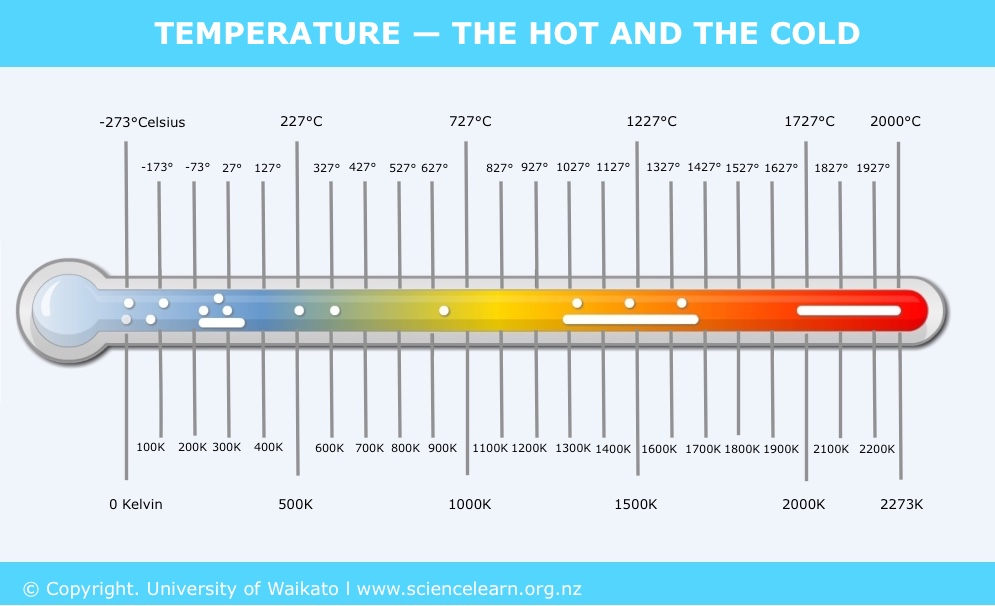

## Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


### Attribute Information:

For more information, read [Cho et al, 2020].

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


### Dataset Link
* https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

* https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
# Retrive the dataset using the raw address
url = "https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv"
df = pd.read_csv(url)

# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (7752, 25)

The column headers in the dataset: Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


This dataset contains 7752 rows and 25 columns. Out of which the variables "Next_Tmax" and "Next_Tmin" are considered as targets for different approaches, the remaining 23 are independent variables described in the above section Project Description.

Since the dataset can be seen from two angles to find the "Next_Tmax"(Regression problem) and the "Next_Tmin" (Regression Problem) we are going to analyze them as target variables during the EDA.

In [6]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


There are two types of data (object and float64 ) present in the dataset. Only Date column is object and the rest of columns are float64.

The dataset presents null values.

## 1.2 Missing values
### 1.2.1 Inspecting the dataset

In [7]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

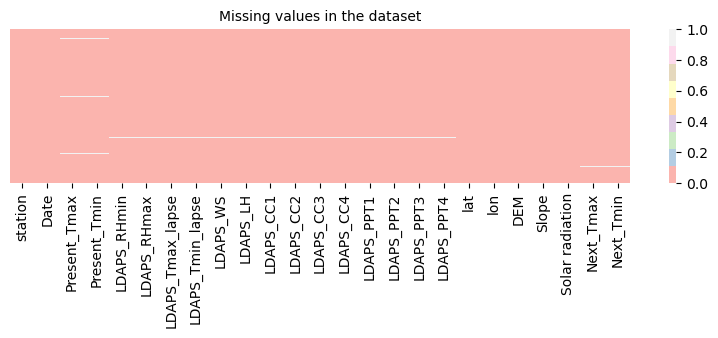

In [10]:
# Let's visualize it using heatmap
plt.figure(figsize=(10,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Pastel1')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present null values but in a minimal proportion. 
The missing values will be treated in further sections.

## 1.3 Features Analysis
### 1.3.1 Unique values

Dropping these 15 rows that do not have any information represents 1.65% of the data.

In [11]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
station                             25  float64
Date                               310   object
Present_Tmax                       167  float64
Present_Tmin                       155  float64
LDAPS_RHmin                       7672  float64
LDAPS_RHmax                       7664  float64
LDAPS_Tmax_lapse                  7675  float64
LDAPS_Tmin_lapse                  7675  float64
LDAPS_WS                          7675  float64
LDAPS_LH                          7675  float64
LDAPS_CC1                         7569  float64
LDAPS_CC2                         7582  float64
LDAPS_CC3                         7599  float64
LDAPS_CC4                         7524  float64
LDAPS_PPT1                        2812  float64
LDAPS_PPT2                        2510  float64
LDAPS_PPT3                        2356  float64
LDAPS_PPT4                        1918  float64
lat                                 12  float64
lon                                 25  float64
DEM                                 25  float64
Slope                               27  float64
Solar radiation                   1575  float64
Next_Tmax                          183  float64
Next_Tmin                          157  float64

About the number of unique values:

- Next_Tmax and Next_Tmin are the target variables with 183 and 157 unique values respectively of 7752 total in the dataset. We are facing two regression problems since both target variables are continuous and numerical. 

- Only the Date datatype is Object, this feature will be converted in datetime later, and the rest of the features are numerical.

- However, the station(25), lat(12), lon(25), DEM(25), and Slope(27) columns, despite being numerical, seem to be categorical and should be analyzed as categorical as well during EDA.

#### 1.3.1.1 Next_Tmax unique values

In [12]:
# Inspect the unique values of the target variable
column = 'Next_Tmax'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")
print(f"# unique values: {df[column].nunique()}\n")

Feature Next_Tmax:
29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64
Unique values: [21.6, 21.8, 22.4, 22.5, 22.8, 23.0, 23.1, 23.2, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30.0, 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31.0, 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31.9, 32.0, 32.1, 32.2, 32.3, 32.4, 32.5, 32.6, 32.7, 32.8, 32.9, 33.0, 33.1, 33.2, 33.3, 33.4, 33.5, 33.6, 33.7, 33.8, 33.9, 34.0, 34.1, 34.2, 34.3, 34.4, 34.5, 34.7, 34.8, nan, 17.4, 18.6, 18.9, 19.5, 19.7, 20.1, 20.3, 20.4, 20.5,

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we need to build a regression model.

#### 1.3.1.2 Next_Tmin unique values

In [23]:
# Inspect the unique values of the target variable
column = 'Next_Tmin'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Next_Tmin:
23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
13.3      1
28.2      1
29.5      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64
Unique values: [17.8, 18.7, 18.9, 19.1, 19.3, 19.4, 19.5, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.8, 26.9, nan, 11.3, 12.9, 13.3, 13.4, 13.6, 13.8, 13.9, 14.1, 14.3, 14.4, 14.6, 14.7, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.8, 19.0, 19.2,

The target variable Next_Tmax has 183 unique values of the 7752 rows in the dataset. In order to predict this feature we will build a regression model since the variable is numerical and continuous.

#### 1.3.1.3 Date unique values

In [56]:
# Inspect the unique values of the Date variable
column = 'Date'
print(f"Feature {column}:\n{df[column].value_counts()}")

Feature Date:
2013-06-30    25
2016-07-18    25
2016-07-25    25
2016-07-24    25
2016-07-23    25
              ..
2014-09-08    25
2014-08-08    25
2014-07-08    25
2014-06-08    25
2017-08-30    25
Name: Date, Length: 310, dtype: int64


Date column has 310 unique values. Next, we will convert this column to datetime type.

In [26]:
# convert the Date column into date
df['Date'] = pd.to_datetime(df['Date'])
# df['month'] = df['Date'].dt.month

In [51]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Now the column Date is in datetype format, and we can use it in our analysis.

#### 1.3.1.4 Independent variables unique values

We will separate the numerical discrete variables from the continuous.

In [55]:
categorical_col = ['station', 'lat', 'lon', 'DEM', 'Slope']
not_num_col = categorical_col + ['Date', 'Next_Tmax', 'Next_Tmin']
numerical_col = [col for col in df.columns if col not in not_num_col]

print(f"Numerical columns as categories: \n{categorical_col}\n")
print(f"Numerical columns: \n{numerical_col}")

Numerical columns as categories: 
['station', 'lat', 'lon', 'DEM', 'Slope']

Numerical columns: 
['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Solar radiation']


#### Categorical columns

In [64]:
for column in categorical_col:
    print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature station:
1.0     310
2.0     310
25.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
14.0    310
13.0    310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
NaN       2
Name: station, dtype: int64
# unique values: 25

Feature lat:
37.5776    1240
37.5507    1240
37.6046     620
37.5102     620
37.4697     620
37.4967     620
37.5372     620
37.6181     620
37.5237     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64
# unique values: 12

Feature lon:
127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310

Although the above columns are numerical, they will be analyzed as categorical since they are discrete.

#### Numerical columns

In [65]:
for column in numerical_col:
    print(f"Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

Feature Present_Tmax:
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64
# unique values: 167

Feature Present_Tmin:
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64
# unique values: 155

Feature LDAPS_RHmin:
19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64
# unique values: 7672

Feature LDAPS_RHmax:
96.525200     2
99.251968     2
100.000153    2
91.878174     2
94.795967     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: LDAPS_RHmax, Length: 7664, dtype: int64
# unique values: 7664

Feature LDAPS_Tmax_lapse:
17.624954

The above features are numerical and continuous.

#### 1.3.1.5 Lat and lon unique values
Since these two features represent a specific position together it will be interesting to analyze them as a whole.
For that purpose, we will combine them in the feature 'position' to determine how many combinations are there in the dataset.

In [68]:
df['position'] = df['lat'].astype(str) + '-' + df['lon'].astype(str)
# df1.groupby(['lat','lon']).count().shape

column = 'position'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
print(f"# unique values: {df[column].nunique()}\n")

Feature position:
37.6046-126.991    310
37.6046-127.032    310
37.5237-126.97     310
37.5237-126.909    310
37.5372-126.891    310
37.5102-127.086    310
37.5507-127.04     310
37.6181-127.004    310
37.5776-126.938    310
37.4832-127.024    310
37.6181-127.099    310
37.4697-126.995    310
37.5507-126.937    310
37.4967-126.927    310
37.5776-127.083    310
37.5507-126.988    310
37.5372-127.085    310
37.4562-126.955    310
37.4967-126.826    310
37.4697-126.91     310
37.5776-126.838    310
37.5102-127.042    310
37.5507-127.135    310
37.645-127.022     310
37.5776-127.058    310
37.4562-126.826      1
37.645-127.135       1
Name: position, dtype: int64
# unique values: 27



As we see  there are 27 unique combinations of lat and lon which means these are specific positions where the samples were taken. It will be interesting to analyze this feature.

### 1.3.2 Imputing Missing values

In [70]:
missing_val

Null values  % of missing
station                     2          0.03
Date                        2          0.03
Present_Tmax               70          0.90
Present_Tmin               70          0.90
LDAPS_RHmin                75          0.97
LDAPS_RHmax                75          0.97
LDAPS_Tmax_lapse           75          0.97
LDAPS_Tmin_lapse           75          0.97
LDAPS_WS                   75          0.97
LDAPS_LH                   75          0.97
LDAPS_CC1                  75          0.97
LDAPS_CC2                  75          0.97
LDAPS_CC3                  75          0.97
LDAPS_CC4                  75          0.97
LDAPS_PPT1                 75          0.97
LDAPS_PPT2                 75          0.97
LDAPS_PPT3                 75          0.97
LDAPS_PPT4                 75          0.97
lat                         0          0.00
lon                         0          0.00
DEM                         0          0.00
Slope                       0          0.00
Solar radiation             0          0.00
Next_Tmax                  27          0.35
Next_Tmin                  27          0.35

Statistically speaking, if the number of missing observations is less than 5% of the sample, we can drop them. 

In all the columns with missing values, the percentage of missing is less than 1% then dropping these data is the best strategy for abording this issue.

However, it would be interesting to save the 27 rows where the target variables have null values in order to try our prediction models.

<!-- # Saving the rows with null values in target variables
df_eval = df[df['Next_Tmax'].isna()]

print(f"The dimension of the eval dataframe is {df_eval.shape}")
df_eval.sample(3) -->

In [80]:
cols_with_missing = missing_val[missing_val['Null values'] > 0].index.to_list()
cols_with_missing

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'Next_Tmax',
 'Next_Tmin']

In [82]:
# Dropping the missing values with % of missing less than 5%
df_new = df.dropna(subset=cols_with_missing)

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

164 rows with missing values were deleted.
This represent 2.12% of the data.
In the new dataset there are 7588 rows and 26 columns.


####  Last check for missing values

In [83]:
df.isnull().sum().sum()

0

No more missing values to remove.

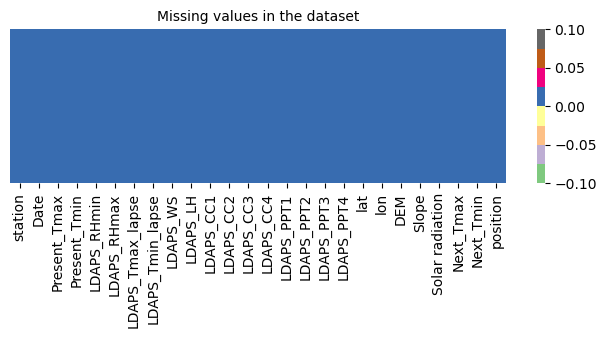

In [84]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [85]:
df.shape

(7588, 26)

Now, the studied dataframe has 7588 rows and 26 columns with no missing values. We lost about 2.12% of the data dropping some rows.

### 1.3.3 Summary statistics of the numerical and non-numerical variables

In [91]:
# Summary statistics of numerical columns
stats = df.describe()
stats

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [87]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

Date        position
count                  7588            7588
unique                  307              25
top     2013-06-30 00:00:00  37.5237-126.97
freq                     25             307
first   2013-01-07 00:00:00             NaN
last    2017-12-08 00:00:00             NaN

**Observations**
- The summary of the dataset looks perfect since there are no negative/invalid values present.
- The counts of all the columns are the same which means there are no more missing values in the dataset

In [92]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

DEM                 16.202136
LDAPS_LH             5.594282
LDAPS_RHmin          1.701770
Slope                0.641755
LDAPS_PPT1           0.589008
LDAPS_WS             0.546259
LDAPS_PPT2           0.480738
LDAPS_PPT3           0.275007
LDAPS_PPT4           0.265373
LDAPS_CC4            0.070808
LDAPS_CC3            0.055751
LDAPS_CC1            0.052804
LDAPS_CC2            0.043852
station              0.014101
lon                 -0.003580
lat                 -0.005908
LDAPS_Tmax_lapse    -0.089409
Present_Tmax        -0.151634
Next_Tmax           -0.158474
Next_Tmin           -0.189180
Present_Tmin        -0.204191
LDAPS_Tmin_lapse    -0.246463
LDAPS_RHmax         -1.423299
Solar radiation    -98.263097
dtype: float64

In [98]:
stats['Solar radiation']

count    7588.000000
mean     5343.724208
std       429.782561
min      4329.520508
25%      5001.485717
50%      5441.987305
75%      5729.485840
max      5992.895996
Name: Solar radiation, dtype: float64

The mean value is larger than the median(50%) in all DEM, LDAPS_LH, LDAPS_RHmin columns. Therefore, the data is skewed to the right.
In fhe columns Solar radiation and LDAPS_RHmax the median(50%) is larger than the mean, then the data is skewed to the left.

In [102]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

LDAPS_LH             83.549084
DEM                  41.769806
LDAPS_PPT1           19.257383
LDAPS_PPT2           17.654268
LDAPS_PPT4           14.030775
LDAPS_PPT3           13.274055
LDAPS_RHmin          12.546648
LDAPS_WS             10.409457
LDAPS_Tmax_lapse      3.035135
Next_Tmax             2.434860
Next_Tmin             1.924669
Present_Tmax          1.916833
Present_Tmin          1.902431
LDAPS_Tmin_lapse      1.422399
Slope                 1.172949
LDAPS_CC4             0.169658
LDAPS_CC3             0.166577
LDAPS_CC2             0.096982
LDAPS_CC1             0.074248
lat                  -0.000649
lon                  -0.014859
station              -2.449816
LDAPS_RHmax          -2.759583
Solar radiation    -210.393335
dtype: float64

Since the max value is greater than two standard deviations plus the mean in the features listed above, there could be outliers in the data. 

### 1.3.3 Duplicates

In [103]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 26)

There are no duplicate values in the dataset.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Next_Tmax feature

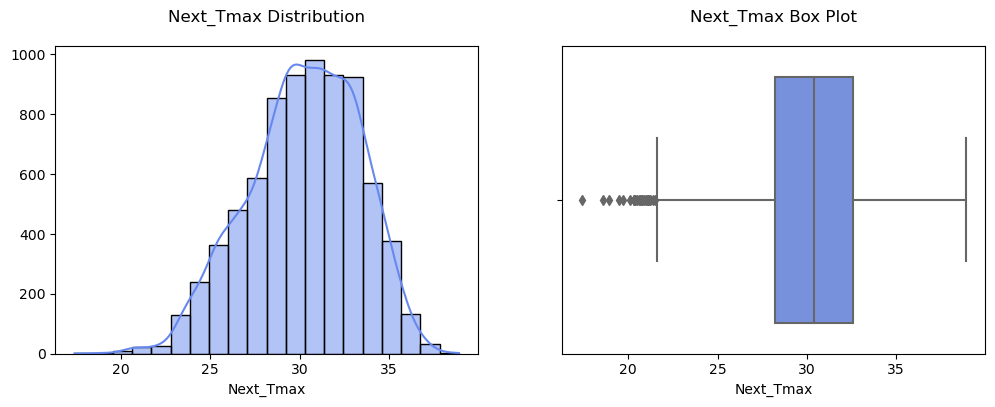

Skewness of Next_Tmax : -0.3348416351390219


In [105]:
#Visualize target distribution
col = 'Next_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Next_Tmax is skewed to the left. There are outliers present in the Box plot.

#### 1.4.1.2 Next_Tmin feature

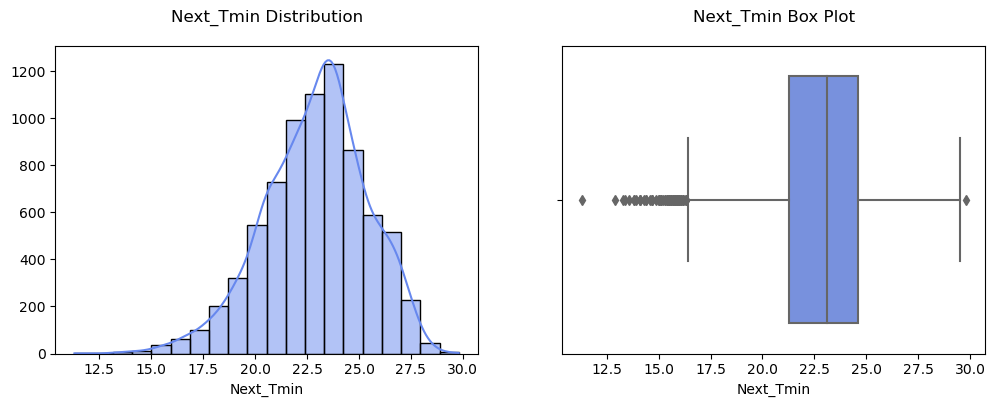

Skewness of Next_Tmin : -0.3936624459457225


In [108]:
#Visualize target distribution
col = 'Next_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Next_Tmin is skewed to the left. There are outliers present in the Box plot.

#### 1.4.1.3 Independent variables 

##### Categorical columns

In [118]:
# add possition column to categorical_col instead of lat and lon
categorical_col = categorical_col + ['position']
categorical_col.remove('lat')
categorical_col.remove('lon')


['station', 'DEM', 'Slope', 'position']

In [122]:
# List of numerical columns that look like categories
for i,col in enumerate(categorical_col):
    print(f"{i+1}. {col}")

1. station
2. DEM
3. Slope
4. position


####  station (1)

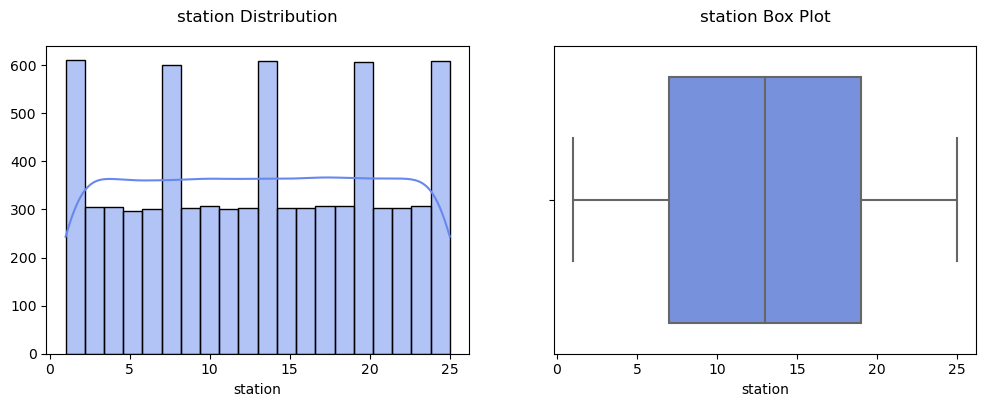

Skewness of station : -0.004177859024526559


In [127]:
#Visualize target distribution
col = 'station'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of station is uniform. There are no outliers present in the Box plot.

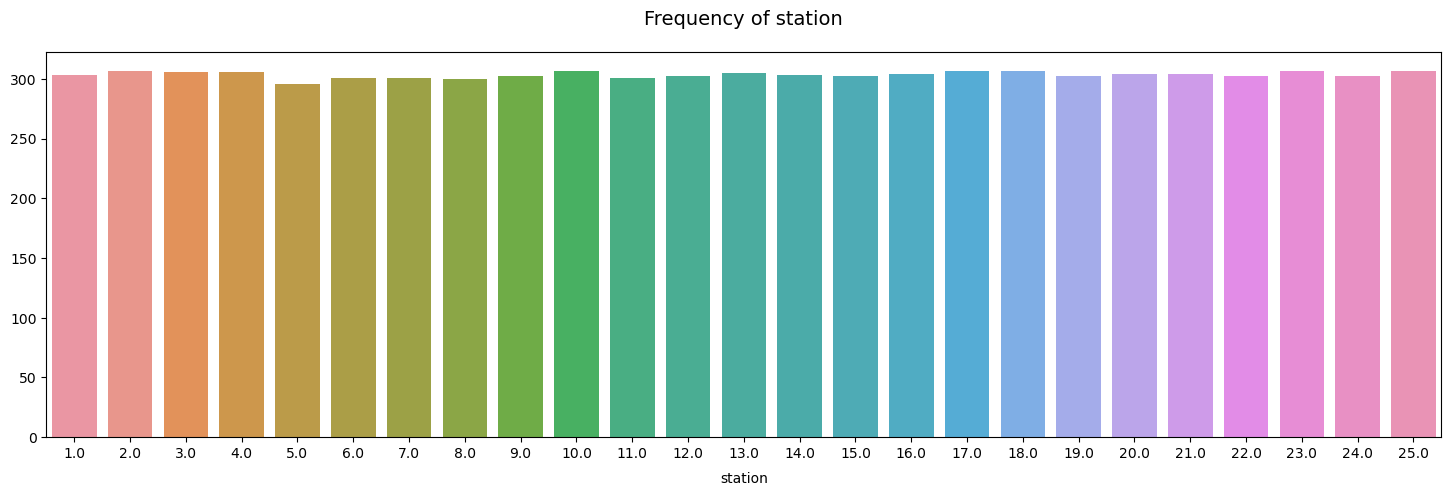

In [121]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of station (1)
column = 'station'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### DEM(2)

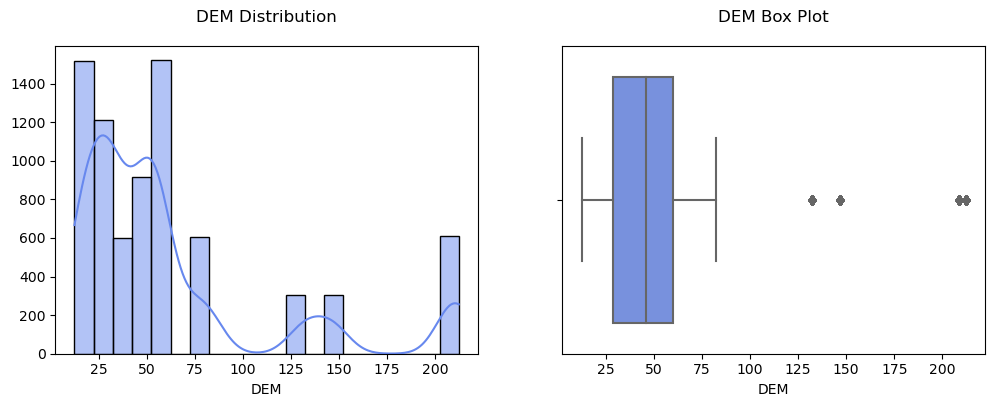

Skewness of DEM : 1.7216166816077285


In [129]:
#Visualize target distribution
col = 'DEM'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of DEM is skewed to the right although is discrete. There are some outliers present in the Box plot.

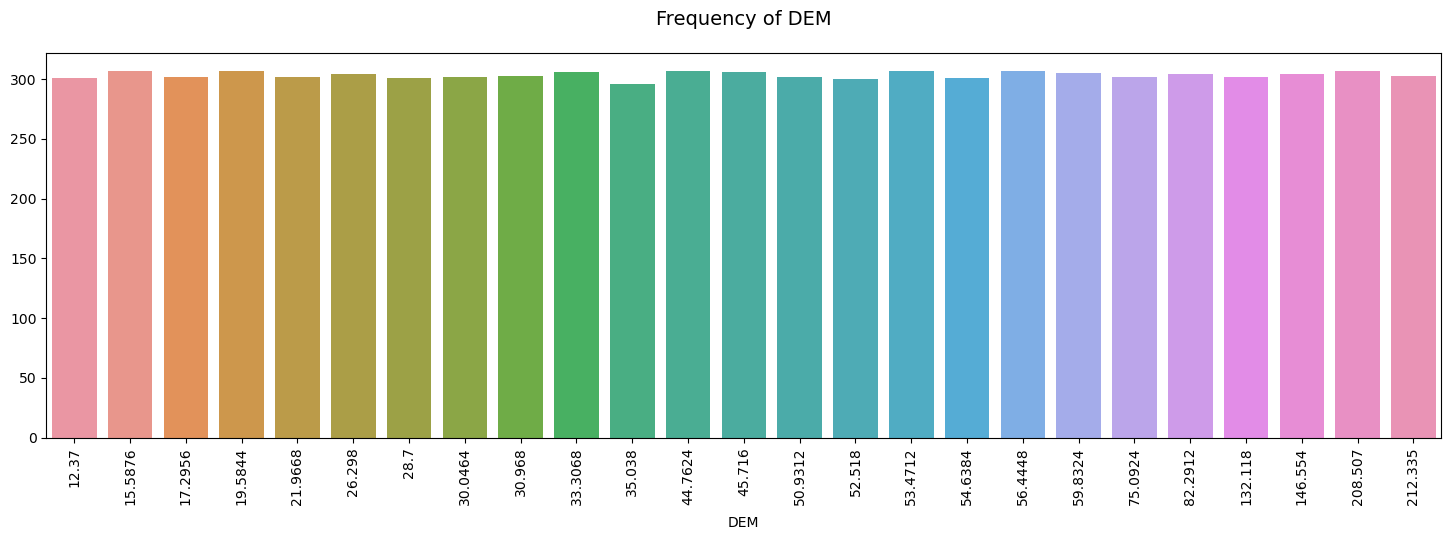

In [130]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of DEM (2)
column = 'DEM'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### Slope (3)

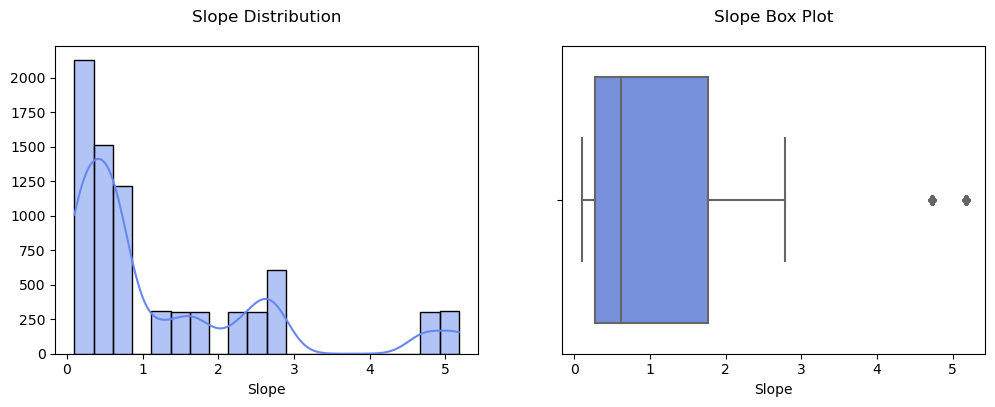

Skewness of Slope : 1.5590502641157087


In [131]:
#Visualize target distribution
col = 'Slope'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of Slope is skewed to the right although is discrete. There are some outliers present in the Box plot.

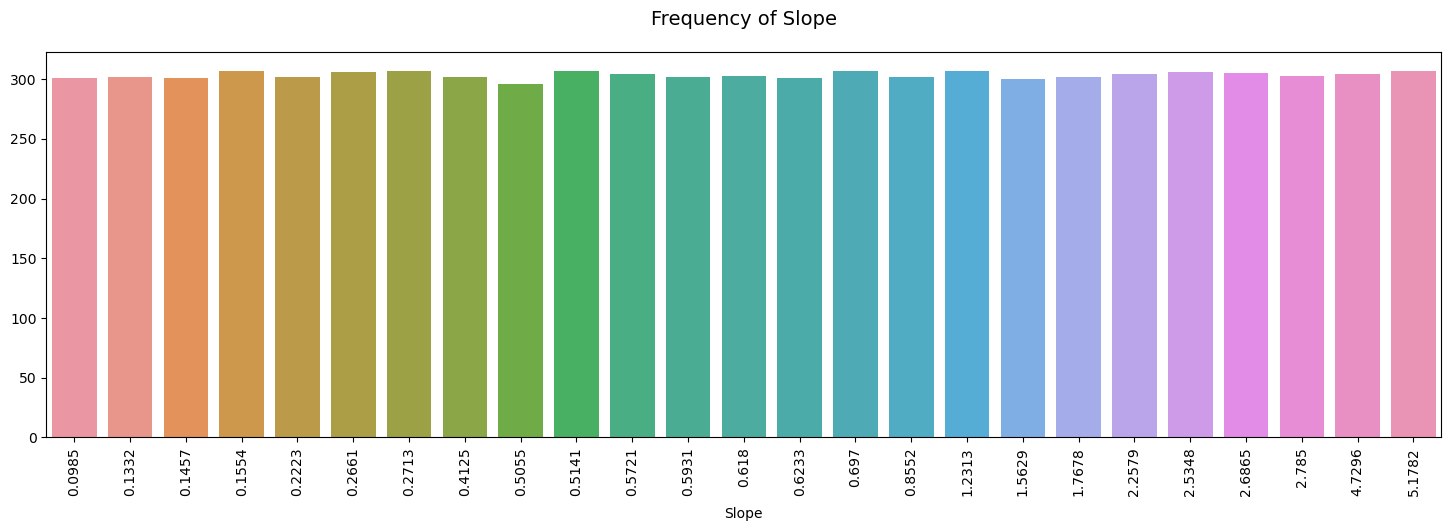

In [125]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of Slope (3)
column = 'Slope'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

#### Position (4)

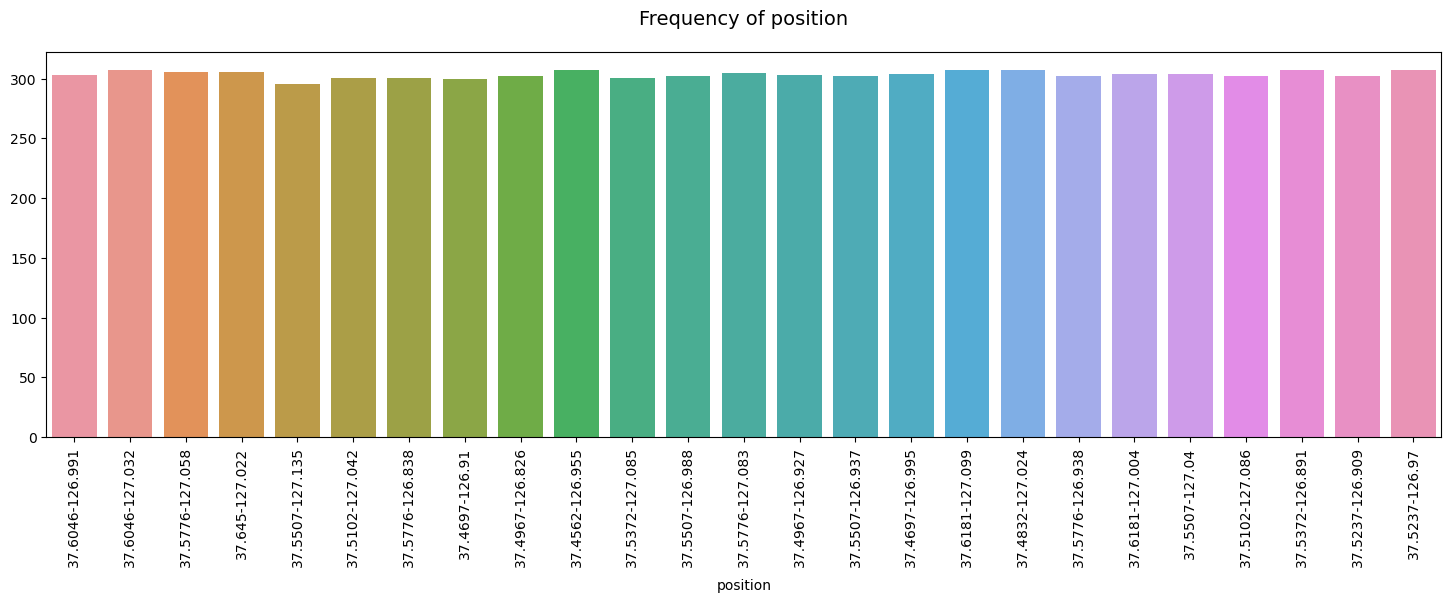

In [126]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of position (4)
column = 'position'
plt.figure(figsize=(18, 5))
ax = sns.countplot(x=column, data=df)

plt.xticks(rotation=90)
plt.xlabel(column, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {column}", size=14, y=1.05);

In [133]:
df.position.nunique()

25

The number of observations of each position is almost the same. There are 25 unique position registered.

#### Numerical columns

In [134]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Present_Tmax
2. Present_Tmin
3. LDAPS_RHmin
4. LDAPS_RHmax
5. LDAPS_Tmax_lapse
6. LDAPS_Tmin_lapse
7. LDAPS_WS
8. LDAPS_LH
9. LDAPS_CC1
10. LDAPS_CC2
11. LDAPS_CC3
12. LDAPS_CC4
13. LDAPS_PPT1
14. LDAPS_PPT2
15. LDAPS_PPT3
16. LDAPS_PPT4
17. Solar radiation


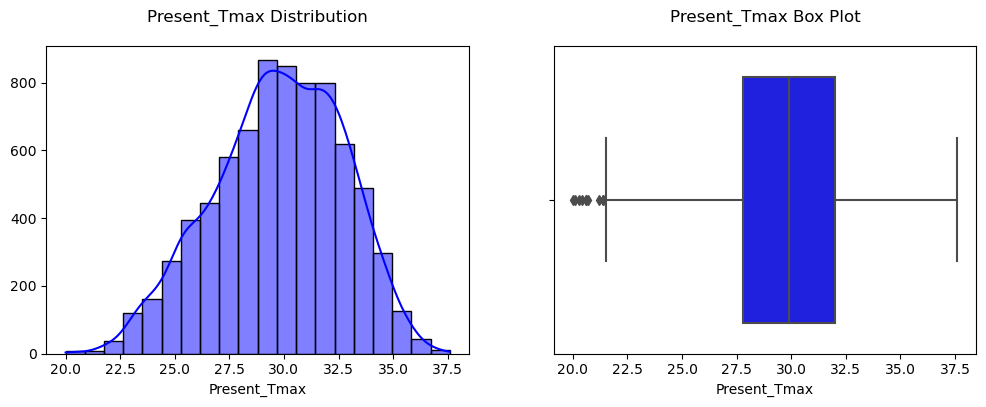

Skewness of Present_Tmax : -0.25706886624626474


In [135]:
#Visualize (1) Present_Tmax
col = 'Present_Tmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Present_Tmax
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Present_Tmax' is slightly skewed to the left. There are outliers present in the Box plot.

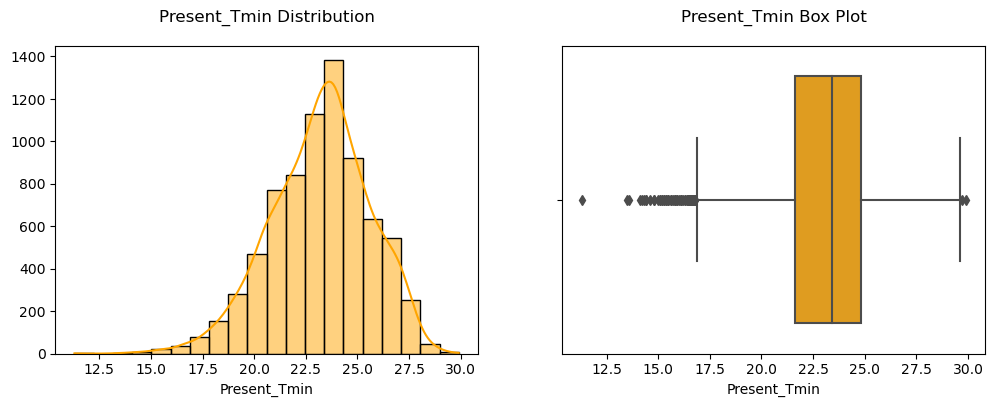

Skewness of Present_Tmin : -0.3538218967241725


In [136]:
#Visualize (2) Present_Tmin
col = 'Present_Tmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Present_Tmin
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Present_Tmin' is slightly skewed to the left. There are outliers present in the Box plot.

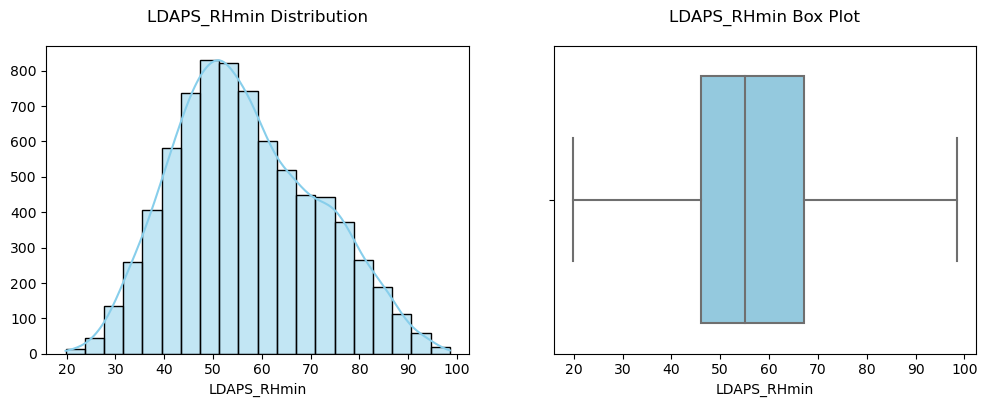

Skewness of LDAPS_RHmin : 0.30139555867014534


In [137]:
#Visualize (3) LDAPS_RHmin
col = 'LDAPS_RHmin'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_RHmin
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_RHmin' is skewed to the right. There are NO outliers present in the Box plot.

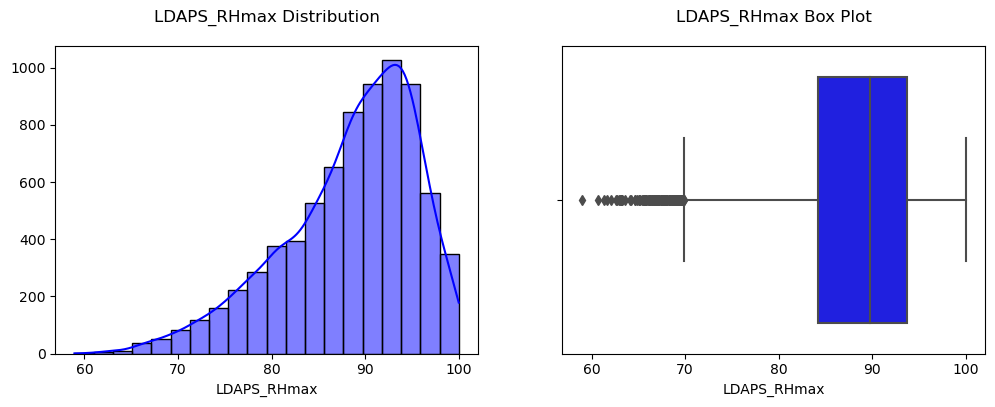

Skewness of LDAPS_RHmax : -0.8452636249574039


In [138]:
#Visualize (4) LDAPS_RHmax
col = 'LDAPS_RHmax'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_RHmax
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_RHmax' is skewed to the left. There are outliers present in the Box plot.

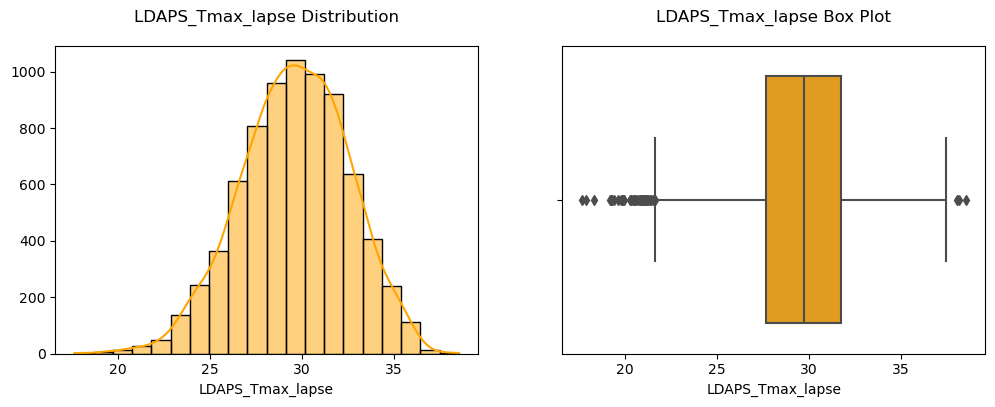

Skewness of LDAPS_Tmax_lapse : -0.22234900075307953


In [143]:
#Visualize (5) LDAPS_Tmax_lapse
col = 'LDAPS_Tmax_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total LDAPS_Tmax_lapse
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_Tmax_lapse' is slightly skewed to the left. There are outliers present in the Box plot.

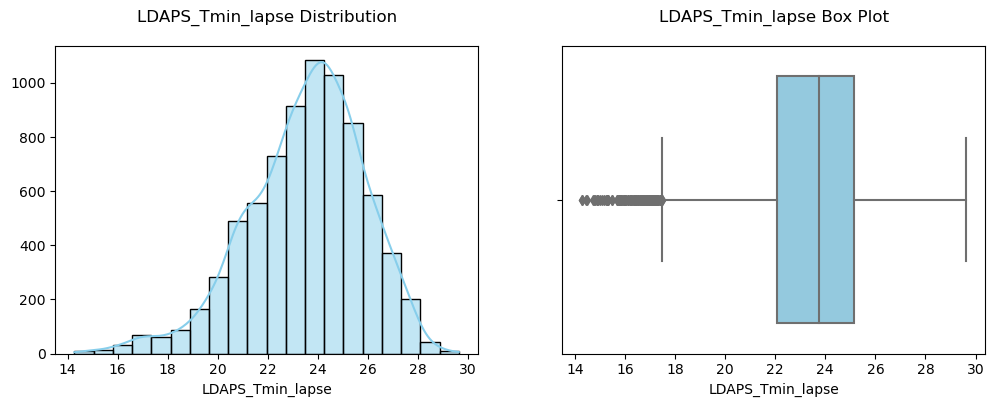

Skewness of LDAPS_Tmin_lapse : -0.5740346797849039


In [144]:
#Visualize (6) LDAPS_Tmin_lapse
col = 'LDAPS_Tmin_lapse'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_Tmin_lapse
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_Tmin_lapse' is skewed to the left. There are outliers present in the Box plot.

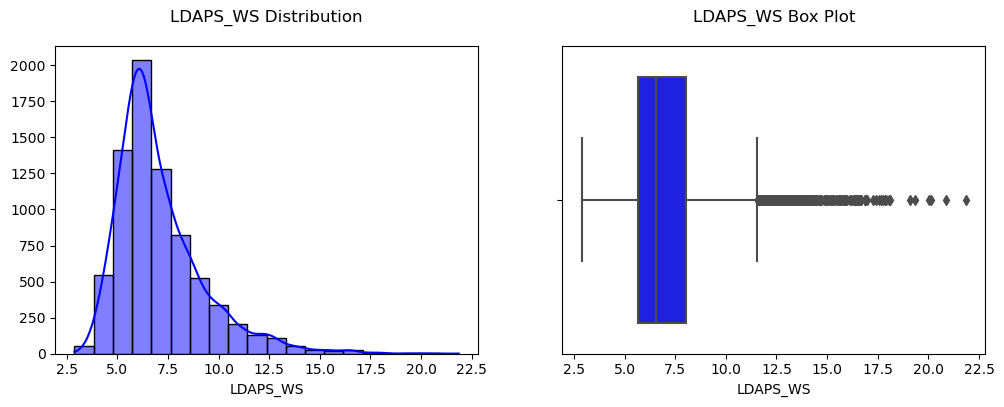

Skewness of LDAPS_WS : 1.5539261125674748


In [145]:
#Visualize (7) LDAPS_WS
col = 'LDAPS_WS'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_WS
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_WS' is skewed to the right. There are outliers present in the Box plot.

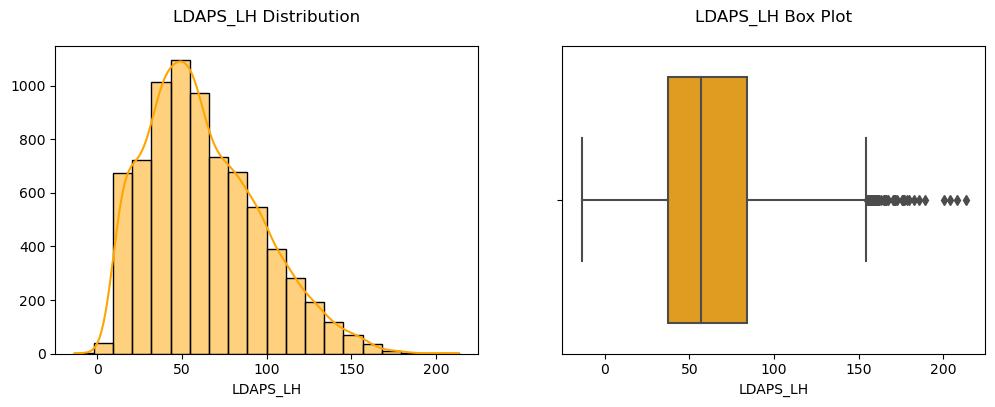

Skewness of LDAPS_LH : 0.6629705787700664


In [146]:
#Visualize (8) LDAPS_LH
col = 'LDAPS_LH'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_LH
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_LH' is skewed to the right. There are outliers present in the Box plot.

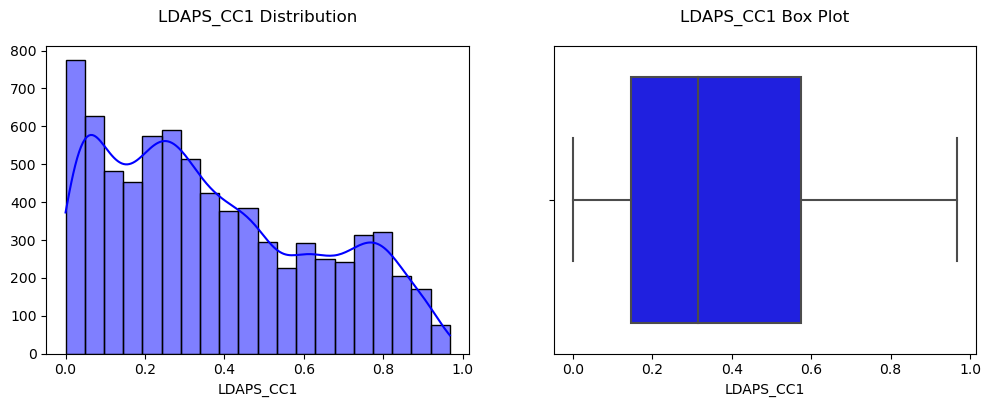

Skewness of LDAPS_CC1 : 0.4567158382781983


In [147]:
#Visualize (9) LDAPS_CC1
col = 'LDAPS_CC1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC1
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC1' is skewed to the right. There are NO outliers present in the Box plot.

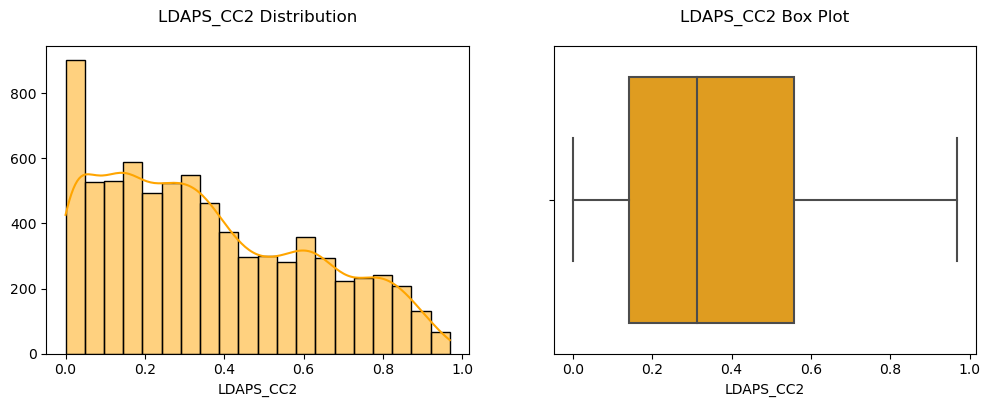

Skewness of LDAPS_CC2 : 0.4739293093576641


In [148]:
#Visualize (10) LDAPS_CC2
col = 'LDAPS_CC2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC2
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC2' is skewed to the right. There are NO outliers present in the Box plot.

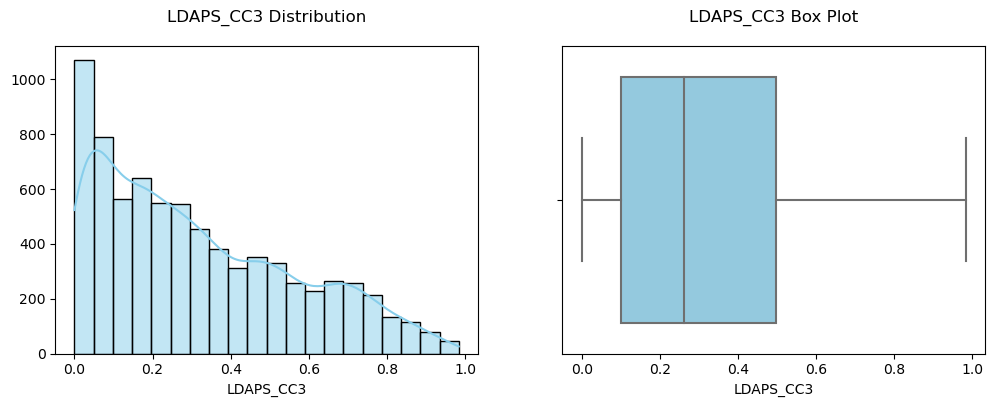

Skewness of LDAPS_CC3 : 0.6396492372098013


In [149]:
#Visualize (11) LDAPS_CC3
col = 'LDAPS_CC3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC3
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC3' is skewed to the right. There are NO outliers present in the Box plot.

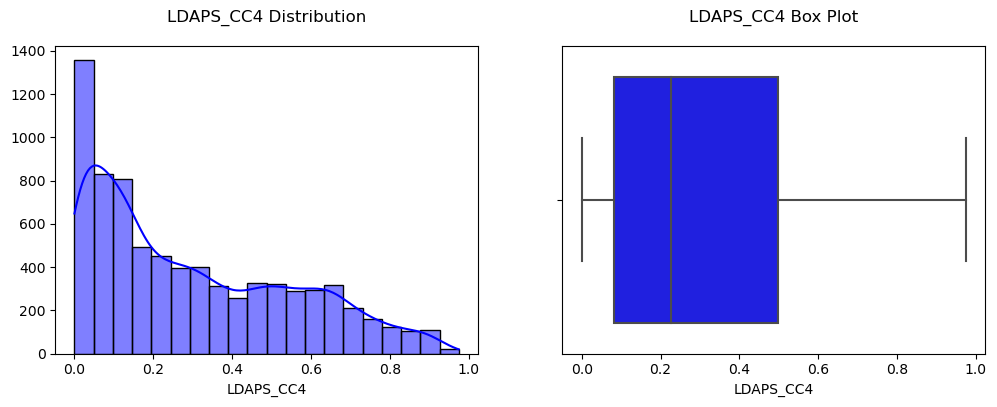

Skewness of LDAPS_CC4 : 0.6638153419746528


In [150]:
#Visualize (12) LDAPS_CC4
col = 'LDAPS_CC4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_CC4
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_CC4' is skewed to the right. There are NO outliers present in the Box plot.

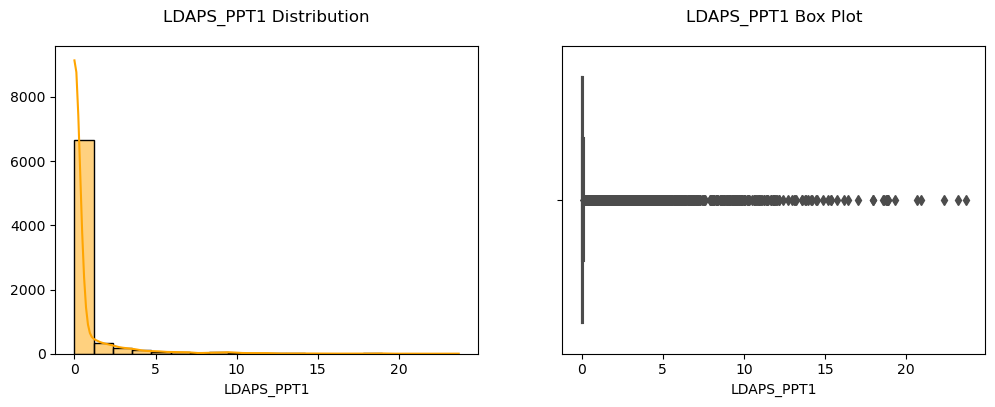

Skewness of LDAPS_PPT1 : 5.3059059957975325


In [155]:
#Visualize (13) LDAPS_PPT1
col = 'LDAPS_PPT1'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total LDAPS_PPT1
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT1' is skewed to the right. There are outliers present in the Box plot.

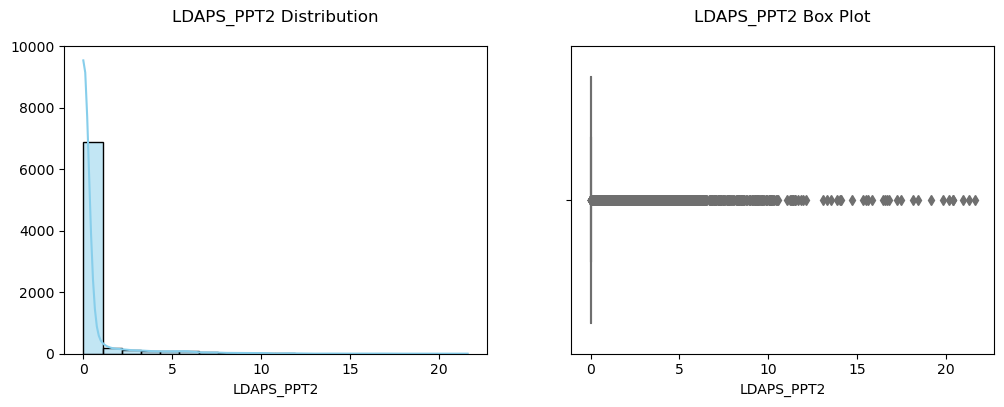

Skewness of LDAPS_PPT2 : 5.710360098053624


In [152]:
#Visualize (14) LDAPS_PPT2
col = 'LDAPS_PPT2'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT2
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT2' is skewed to the right. There are outliers present in the Box plot.

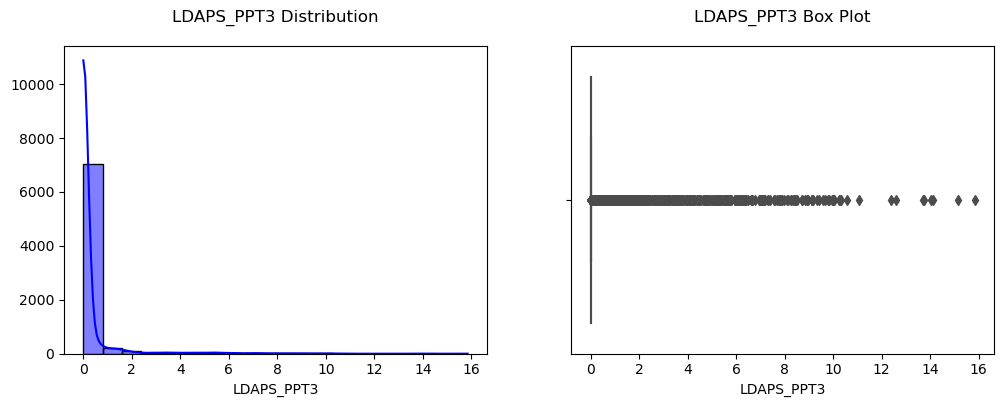

Skewness of LDAPS_PPT3 : 6.356670451431369


In [153]:
#Visualize (15) LDAPS_PPT3
col = 'LDAPS_PPT3'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT3
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT3' is skewed to the right. There are outliers present in the Box plot.

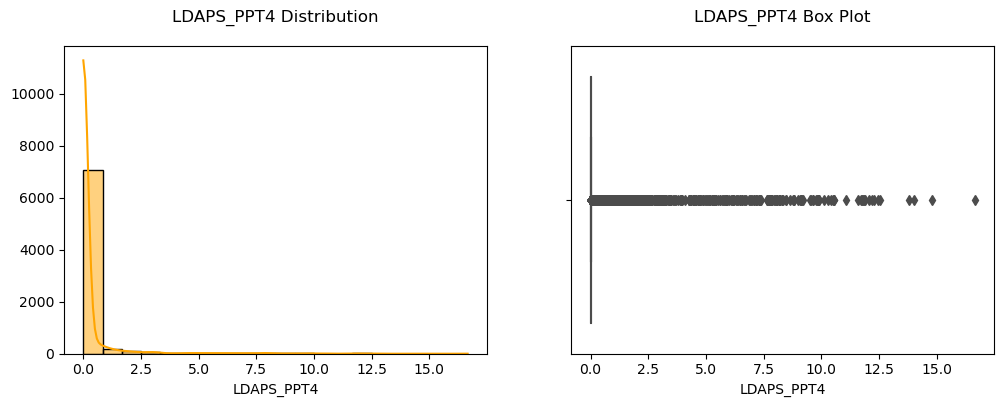

Skewness of LDAPS_PPT4 : 6.6812557353191435


In [154]:
#Visualize (16) LDAPS_PPT4
col = 'LDAPS_PPT4'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of LDAPS_PPT4
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'LDAPS_PPT4' is skewed to the right. There are outliers present in the Box plot.

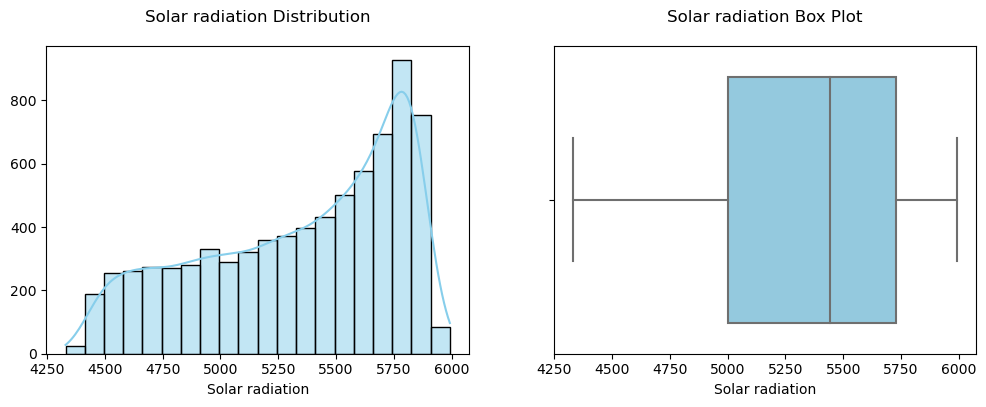

Skewness of Solar radiation : -0.5243245791911233


In [156]:
#Visualize (17) Solar radiation
col = 'Solar radiation'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Solar radiation
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Solar radiation' is skewed to the left. There are NO outliers present in the Box plot.

#### 1.4.1.4 Univariate Boxplot

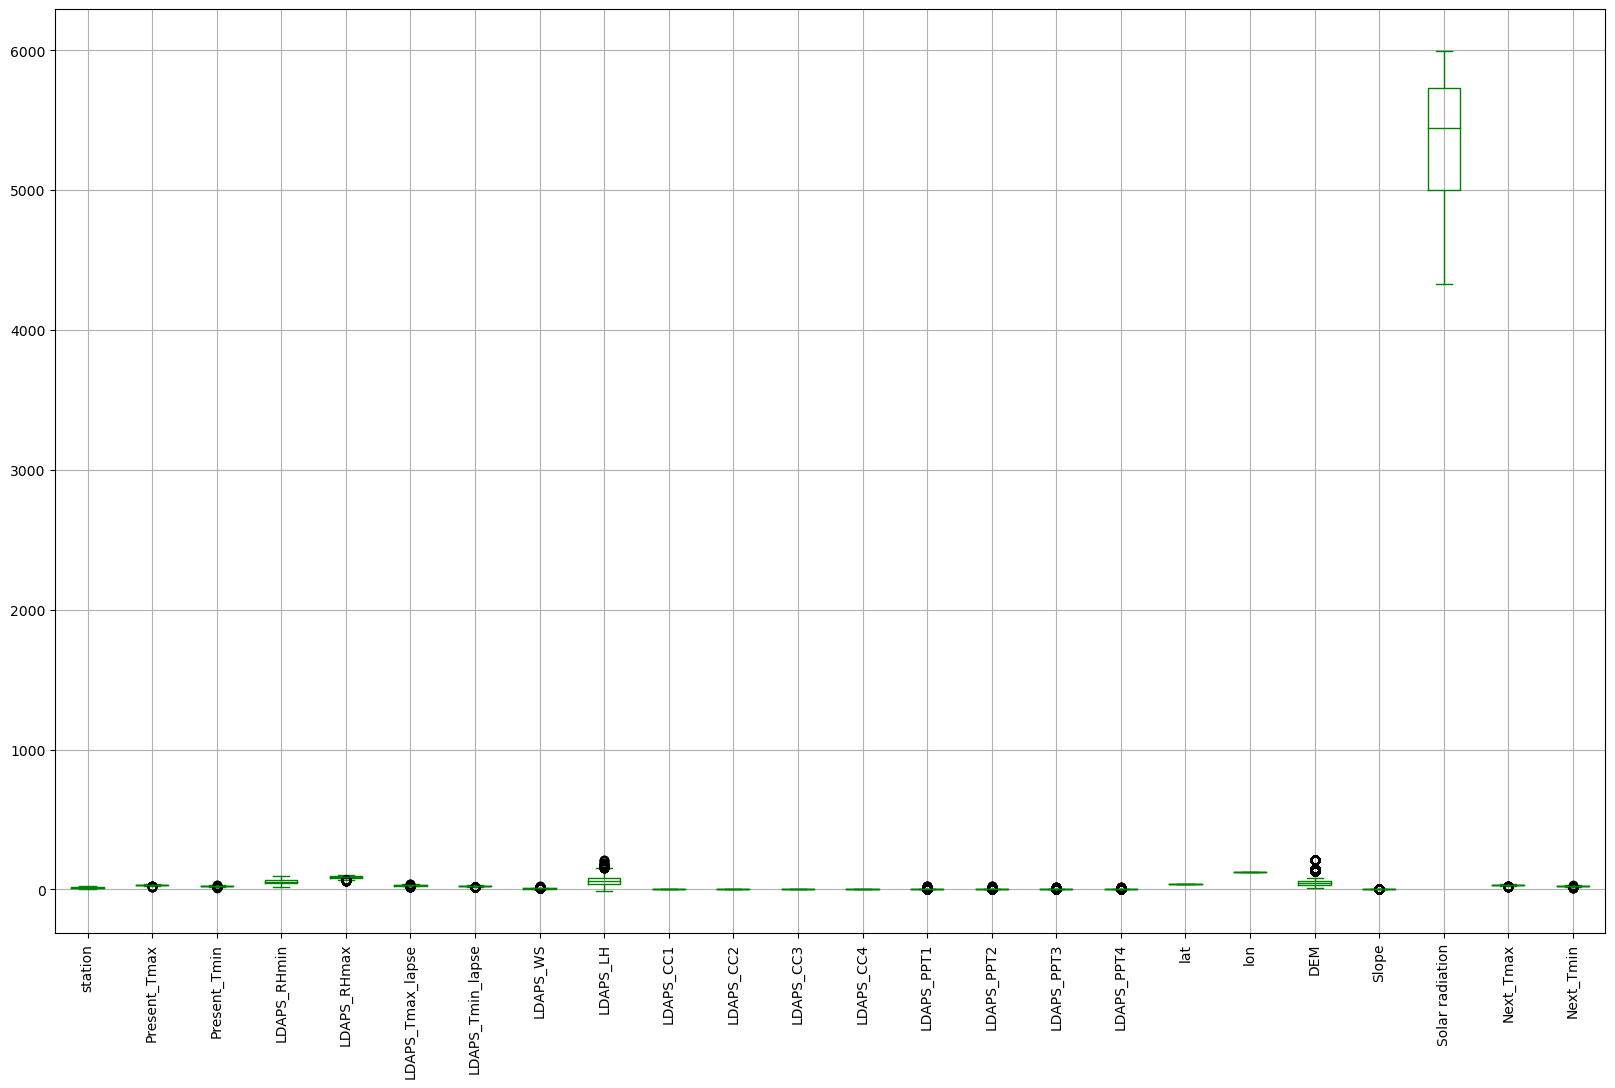

In [159]:
# Draw a boxplot for each independent variable 
df.boxplot(figsize=(20,12), color='green')
plt.xticks(rotation=90)
plt.show()

The data is in different scales therefore it will be scaled later in the analysis. Solar radiation has a different scale noticeably.

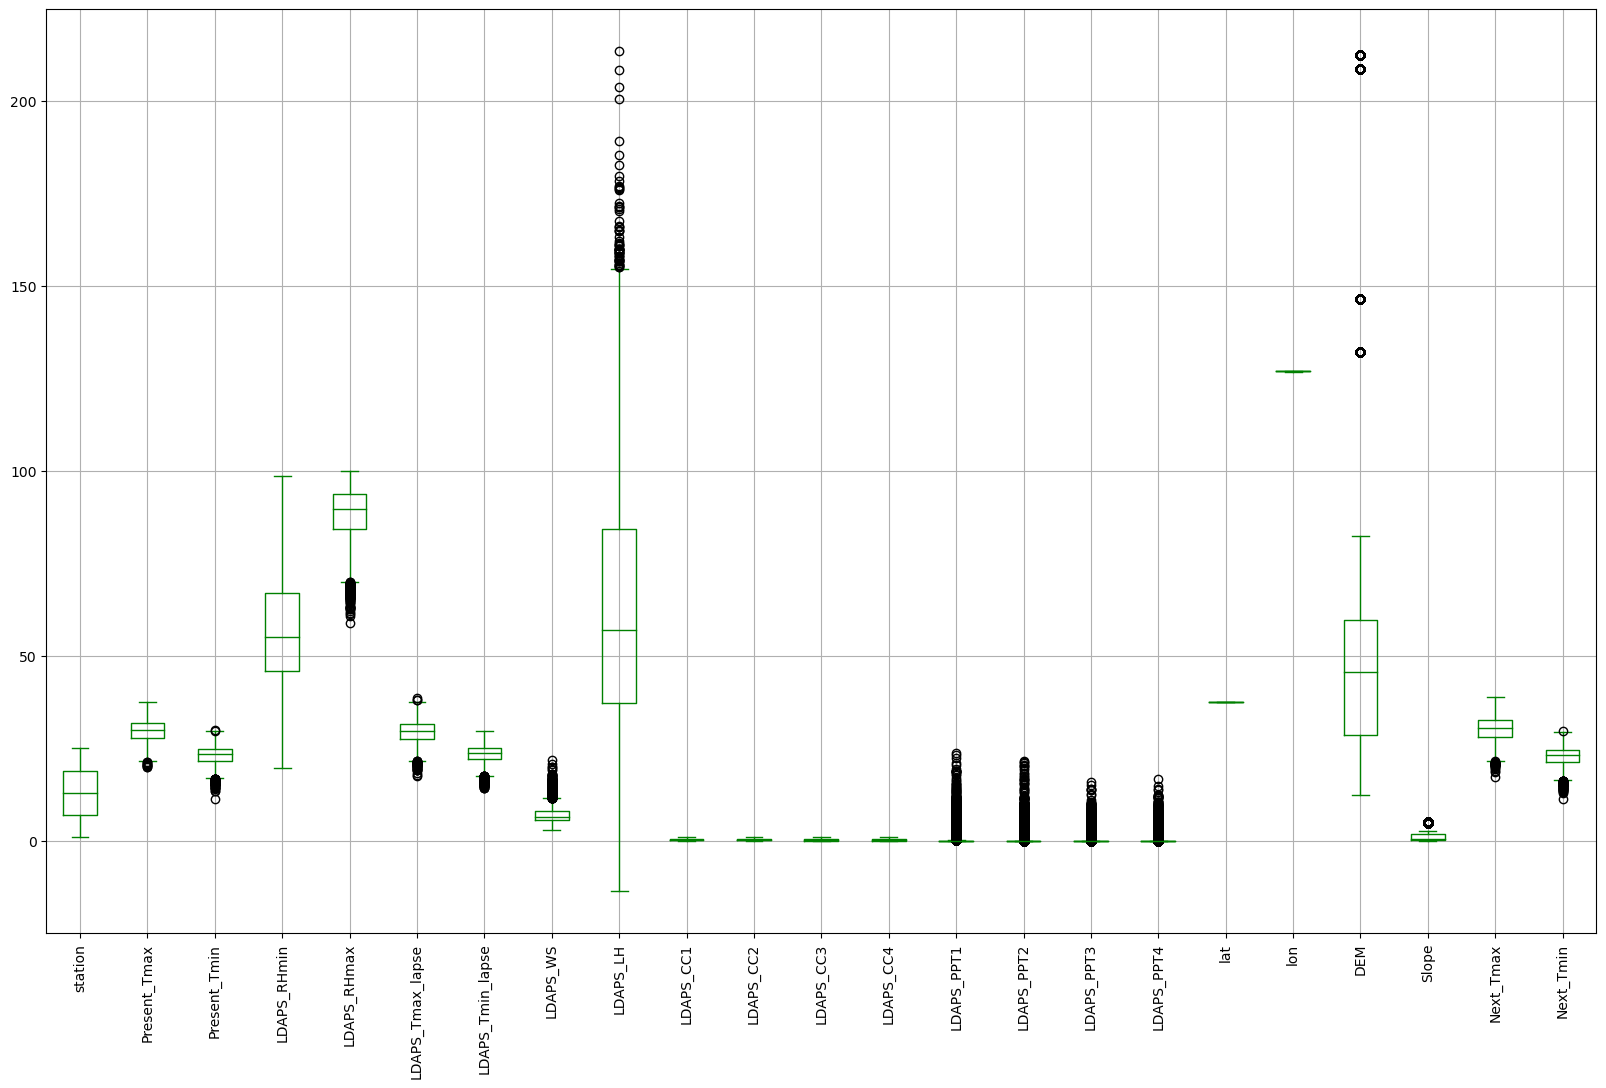

In [160]:
# Draw a boxplot for each independent variable 
df.drop('Solar radiation', axis=1).boxplot(figsize=(20,12), color='green')
plt.xticks(rotation=90)
plt.show()

Above we plot all features but 'Solar radiation' and we can conclude the other columns are in different scales too.

### 1.4.2  Bivariate Analysis

#### 1.4.2.1 Comparing the Next Day's maximum and minimum temperature over time

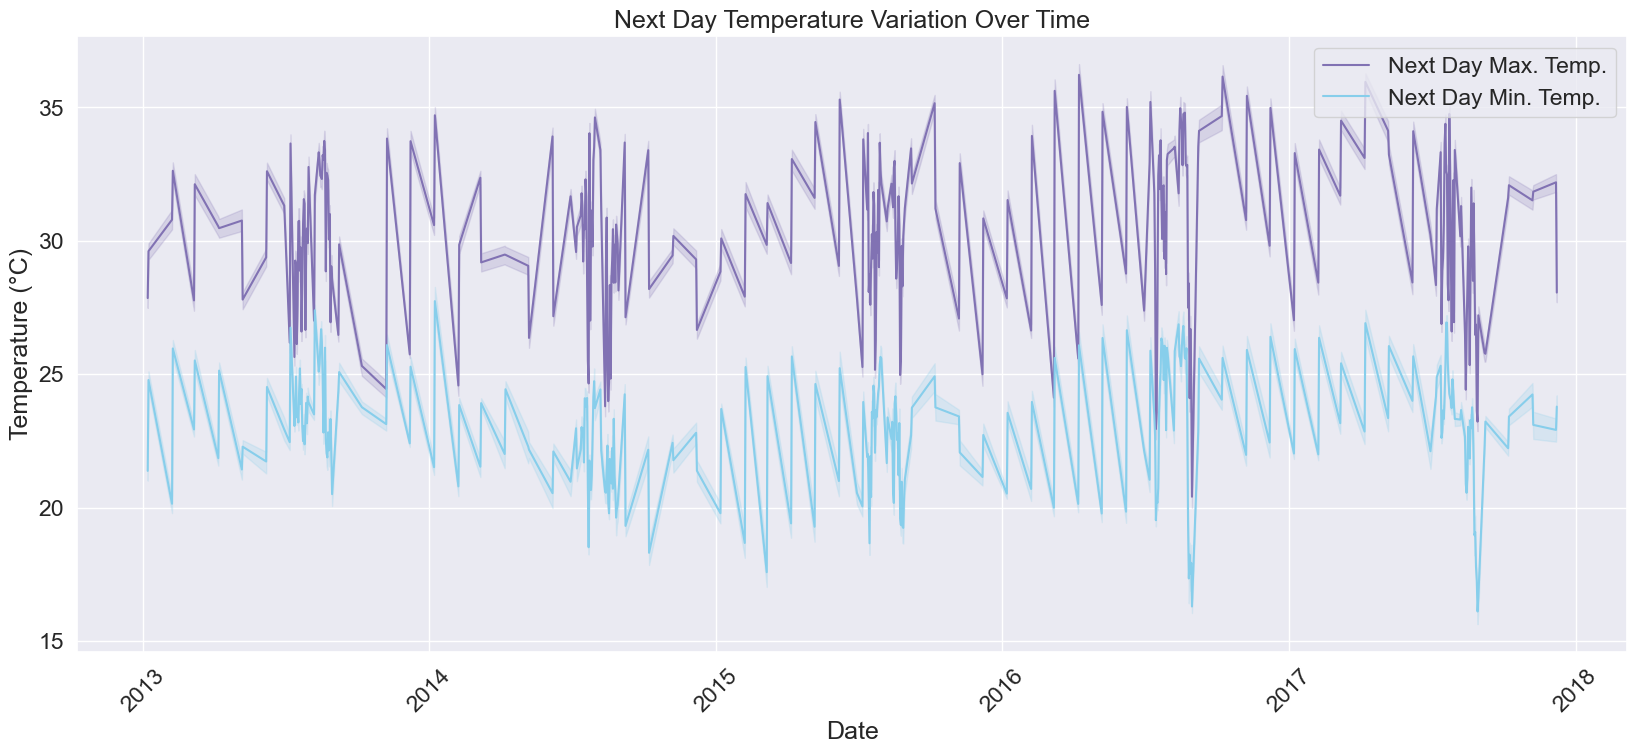

In [186]:
# Style settings
sns.set_style('whitegrid')
sns.set(font_scale=1.5)  
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Next_Tmax', data=df, label='Next Day Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Next_Tmin', data=df, label='Next Day Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

The above plot shows how the maximum and minimum next-day temperature was registered over time. The maximum temperature registered was about 36 C in the last quarter of 2016, and the lowest where registered in the last quarter of 2018.

#### 1.4.2.2 Comparison of current maximum and minimum temperature over time

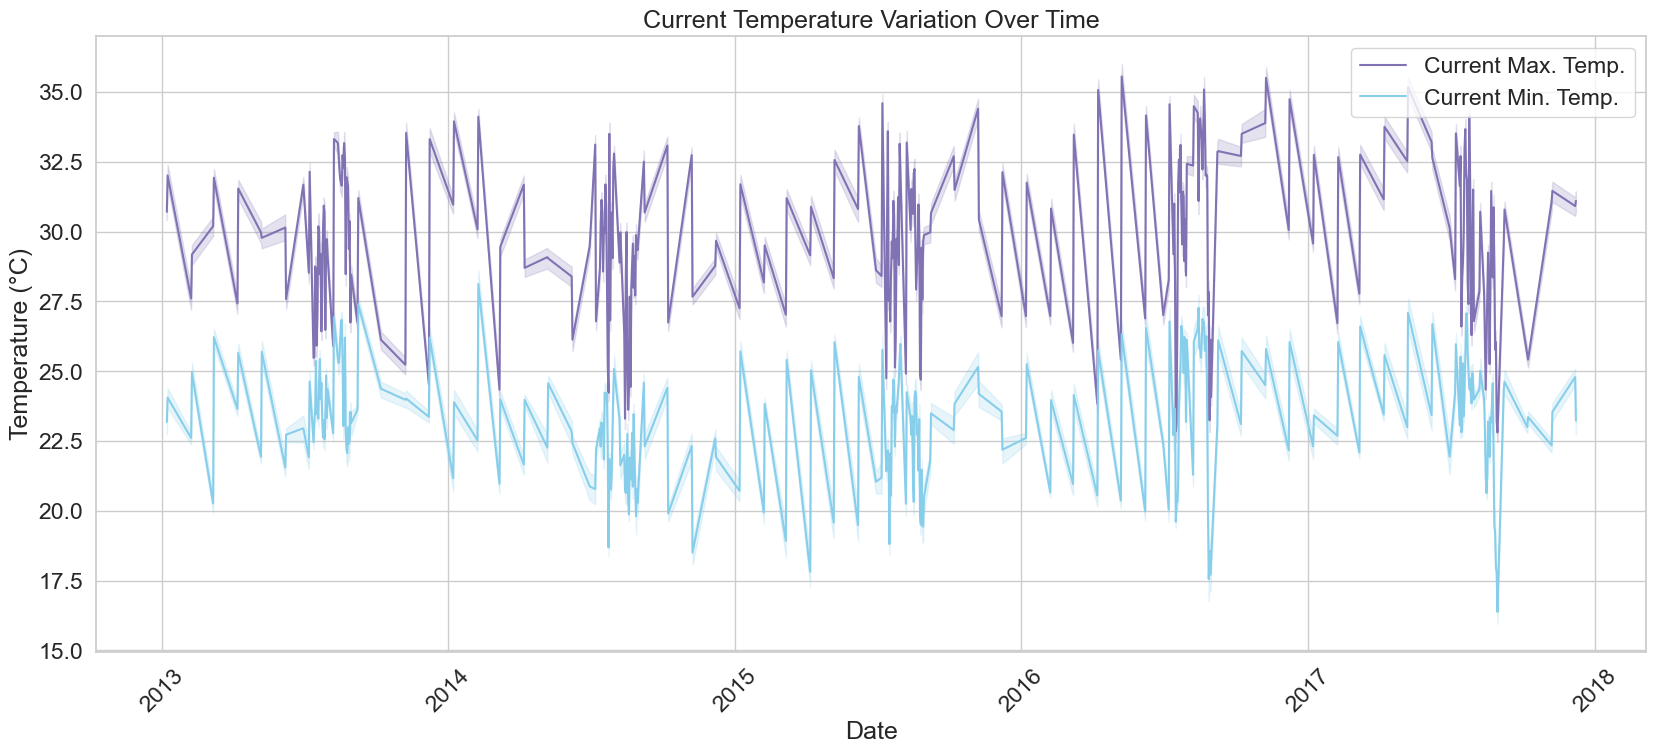

In [185]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='Present_Tmax', data=df, label='Current Max. Temp.', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='Present_Tmin', data=df, label='Current Min. Temp.', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Current Temperature Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

Above plot shows how the maximum and minimum current temperature was registered over the time.

#### 1.4.2.3 Comparison of Next Day's humidity level over time

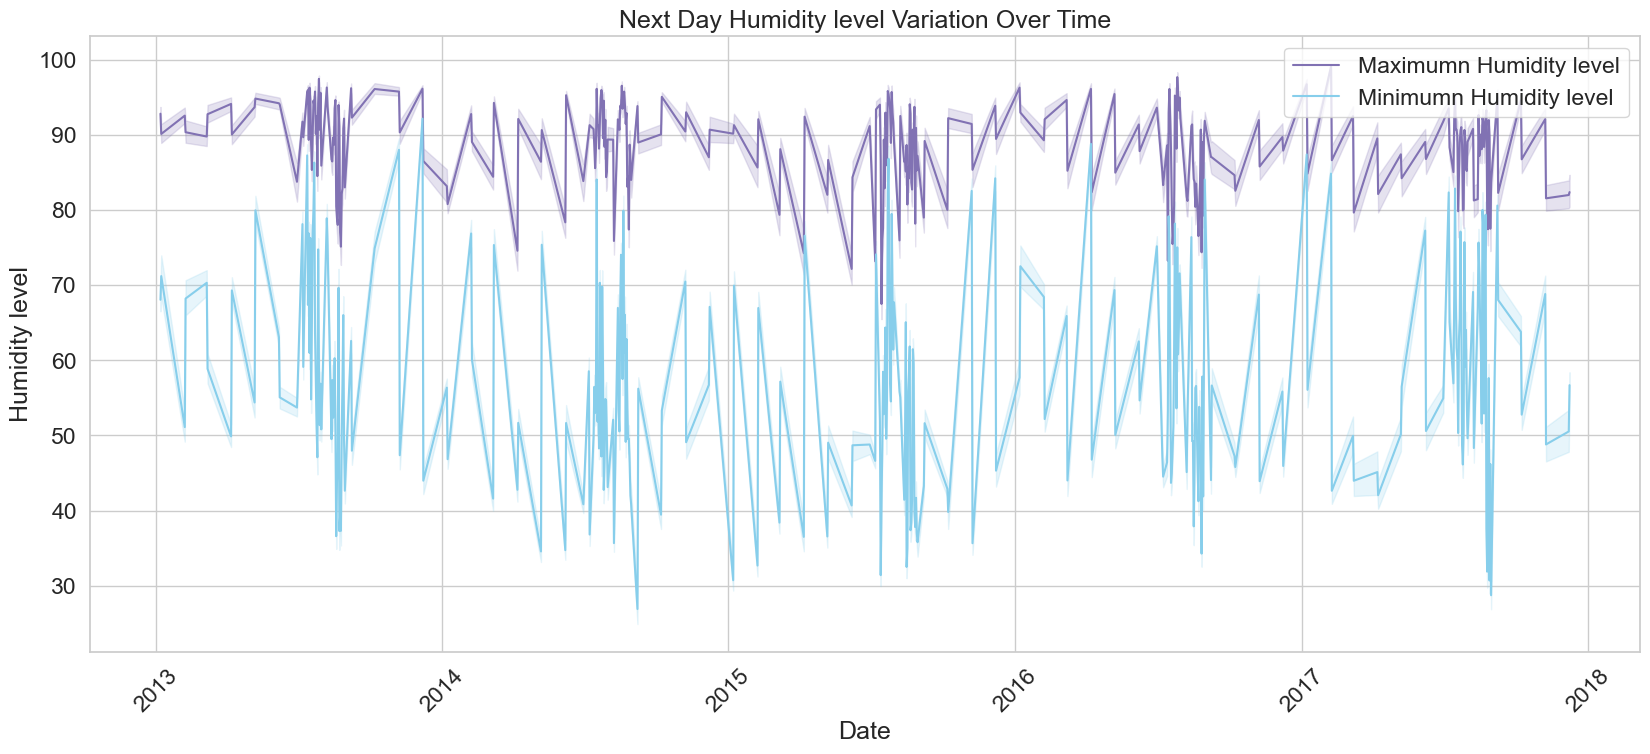

In [184]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmax', data=df, label='Maximumn Humidity level', color='m')

# line plot for the minimun humidity level 
sns.lineplot(x='Date', y='LDAPS_RHmin', data=df, label='Minimumn Humidity level', color='skyblue')

# style the plot
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.title('Next Day Humidity level Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity level')

plt.show()

Above plot shows how the maximum and minimum next-day humidity level was registered over the time.

#### 1.4.2.4 Comparison of Next Day's Temperatue applied lapse rate over time

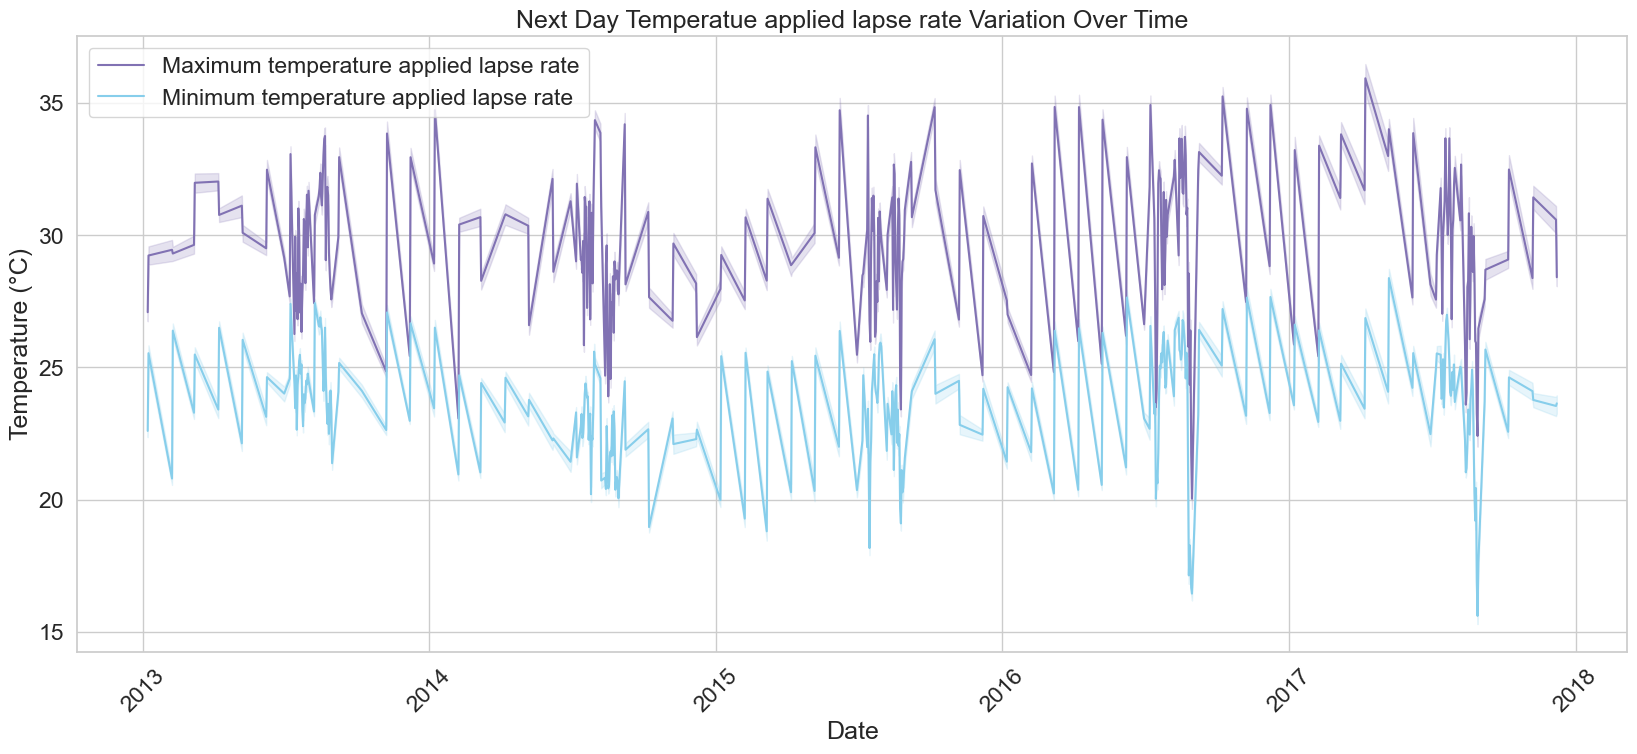

In [183]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))

# line plot for the maximum temperature 
sns.lineplot(x='Date', y='LDAPS_Tmax_lapse', data=df, label='Maximum temperature applied lapse rate', color='m')

# line plot for the minimun temperature 
sns.lineplot(x='Date', y='LDAPS_Tmin_lapse', data=df, label='Minimum temperature applied lapse rate', color='skyblue')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Next Day Temperatue applied lapse rate Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.show()

Above plot shows how the maximum and minimum next-day temperature applied lapse rate was registered over the time.

#### 1.4.2.5 Comparison model forecast of next-day split average cloud cover over time

* LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
* LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
* LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
* LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

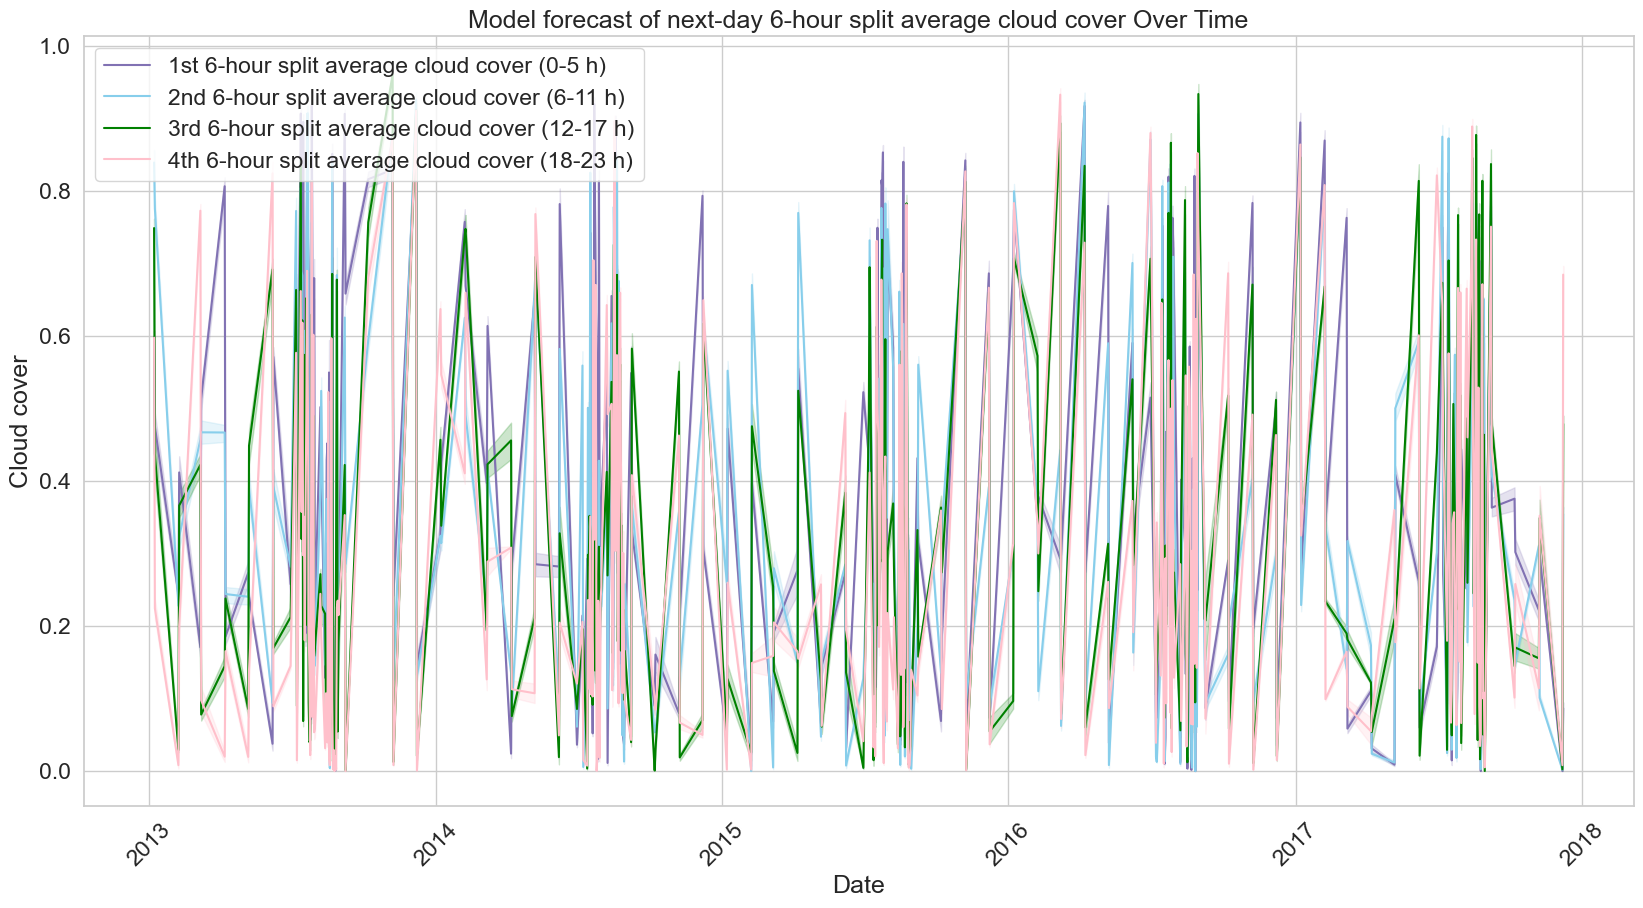

In [191]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_CC1', data=df, label='1st 6-hour split average cloud cover (0-5 h)', color='m')
sns.lineplot(x='Date', y='LDAPS_CC2', data=df, label='2nd 6-hour split average cloud cover (6-11 h)', color='skyblue')
sns.lineplot(x='Date', y='LDAPS_CC3', data=df, label='3rd 6-hour split average cloud cover (12-17 h)', color='green')
sns.lineplot(x='Date', y='LDAPS_CC4', data=df, label='4th 6-hour split average cloud cover (18-23 h)', color='pink')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average cloud cover Over Time')
plt.xlabel('Date')
plt.ylabel('Cloud cover')

plt.show()

Above plot shows how the Average cloud cover was registered over the time.

#### 1.4.2.6 Comparison model forecast of next-day split average precipitation over time

* LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
* LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
* LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
* LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

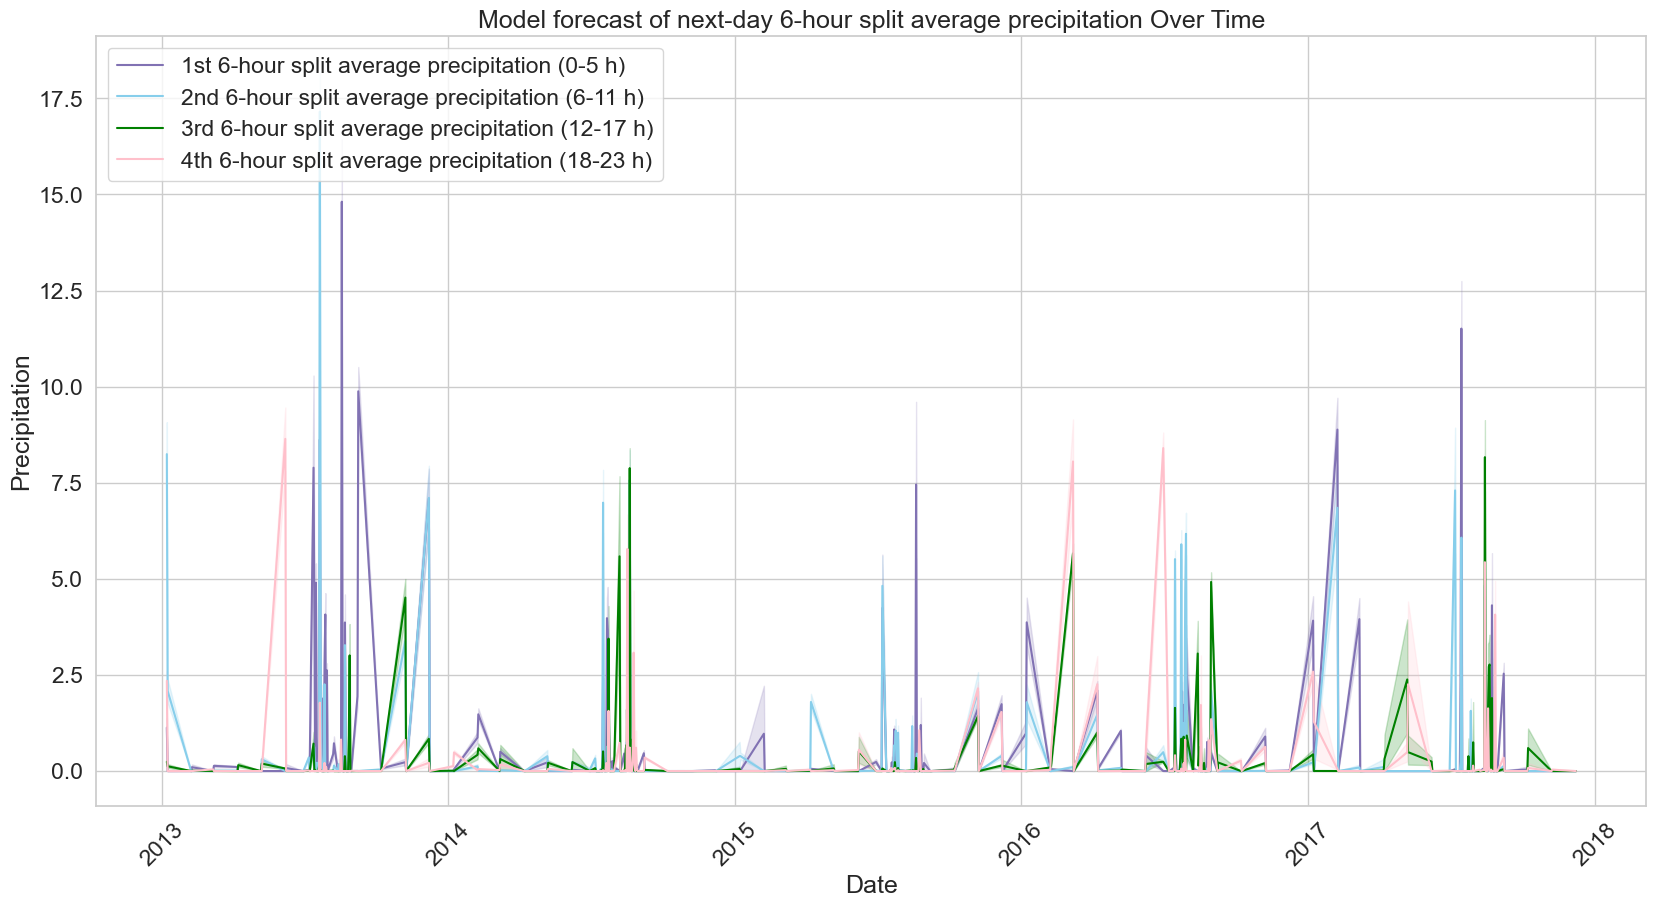

In [192]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_PPT1', data=df, label='1st 6-hour split average precipitation (0-5 h)', color='m')
sns.lineplot(x='Date', y='LDAPS_PPT2', data=df, label='2nd 6-hour split average precipitation (6-11 h)', color='skyblue')
sns.lineplot(x='Date', y='LDAPS_PPT3', data=df, label='3rd 6-hour split average precipitation (12-17 h)', color='green')
sns.lineplot(x='Date', y='LDAPS_PPT4', data=df, label='4th 6-hour split average precipitation (18-23 h)', color='pink')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day 6-hour split average precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()

Above plot shows how the Average precipitation was registered over the time.

#### 1.4.2.7 Model forecast of next-day average wind speed over time

* LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 

In [ ]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_WS', data=df, label='Average wind speed (m/s)', color='m')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average wind speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average wind speed (m/s) ')

plt.show()

Above plot shows how the next-day average wind speed was registered over the time.

#### 1.4.2.8 Model forecast of next-day average latent heat flux (W/m2) over time

* LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

In [ ]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='LDAPS_LH', data=df, label='Average latent heat flux (W/m2)', color='b')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Model forecast of next-day average latent heat flux Over Time')
plt.xlabel('Date')
plt.ylabel('Average latent heat flux (W/m2) ')

plt.show()

Above plot shows how the next-day average latent heat flux was registered over the time.

#### 1.4.2.9 Elevation over time

* DEM - Elevation (m): 12.4 to 212.3

In [ ]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='DEM', data=df, label='Elevation (m)', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Elevation Over Time')
plt.xlabel('Date')
plt.ylabel('Elevation (m) ')

plt.show()

Above plot shows how the elevation was registered over the time.

#### 1.4.2.10 Slope  over time

* Slope - Slope (Â°): 0.1 to 5.2

In [ ]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Slope', data=df, label='Slope', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Slope Over Time')
plt.xlabel('Date')
plt.ylabel('Slope ')

plt.show()

Above plot shows how the Slope was registered over the time.

#### 1.4.2.11 Daily incoming Solar radiation over time

* Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

In [ ]:
# Style settings
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))

sns.lineplot(x='Date', y='Solar radiation', data=df, label='Solar radiation', color='green')

# style the plot
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Daily incoming Solar radiation Over Time')
plt.xlabel('Date')
plt.ylabel('Solar radiation (wh/m2)')

plt.show()

Above plot shows how the Solar radiation was registered over the time.

#### 1.4.2.12  Plants location categorized by Primary Fuel

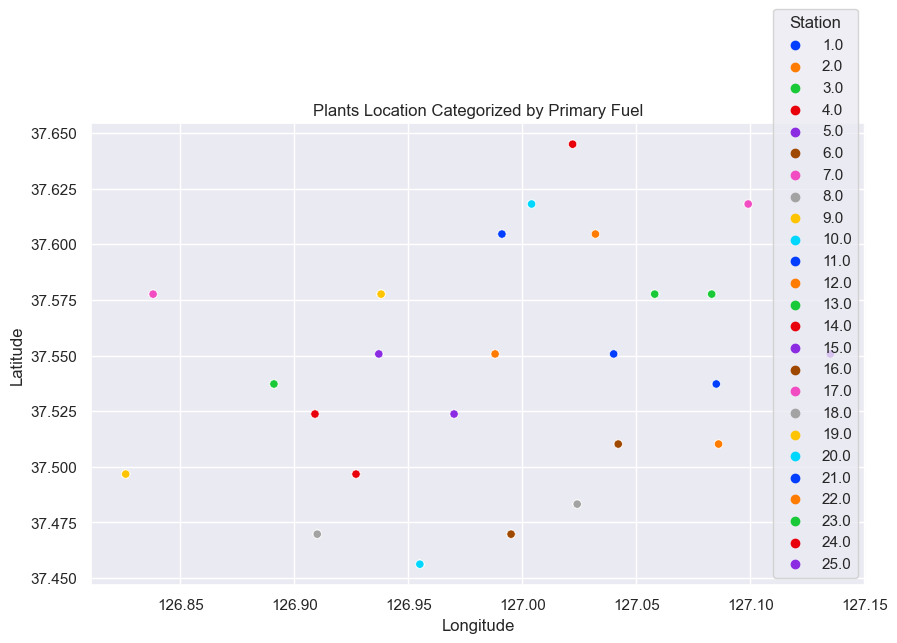

In [196]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1)  

# Map simulation with scatterplot
sns.scatterplot(x='lon', y='lat', hue='station', data=df, palette='bright')

# visual presentation
plt.legend(loc='lower right').set_title("Station")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plants Location Categorized by Primary Fuel')
plt.show()


Above we simulate a map with the position of each position where the observation were taken by station.

### 1.4.3 Multivariate Analysis


#### 1.4.3.1 Pairplot

In [ ]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

We can see that the capacity_mw variable has a strong positive relationship with the power generation variables which makes sense.

The generation_gwh variables have a positive relationship with each other. 

#### 1.4.3.2  Encoding categorical columns
In order to make the multivariate Analysis we need to encode the categorical features, for this purpose, we will use OrdinalEncoder.

<!-- df_backup5 = df.copy() -->

In [94]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

category_mappings = {}

for col in (categorical_col + ['primary_fuel']):
    # Fit and transform the column
    df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
    # Store the category mappings 
    category_mappings[col] = OE.categories_[0].tolist()

display(df.head())
display(df.tail())

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407           6.0              2011.0   109.0   
1         98.0   24.7663    74.6090           1.0              2015.0   174.0   
2         39.2   21.9038    69.3732           7.0              2015.0    21.0   
3        135.0   23.8712    91.3602           2.0              2004.0    22.0   
4       1800.0   21.9603    82.4091           1.0              2015.0    22.0   

     url  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0  126.0                 1.0           801.123775           711.181225   
1  169.0                 2.0           801.123775           711.181225   
2  196.0                 2.0           801.123775           711.181225   
3   58.0                 2.0           617.789264           843.747000   
4   58.0                 2.0          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0           737.205450           817.977250           751.644375  
1           737.205450           817.977250           751.644375  
2           737.205450           817.977250           751.644375  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
902       1600.0   16.2949    77.3568           1.0              2016.0   
903          3.0   12.8932    78.1654           6.0              2015.0   
904         25.5   15.2758    75.5811           7.0              2015.0   
905         80.0   24.3500    73.7477           1.0              2015.0   
906         16.5    9.9344    77.4768           7.0              2015.0   

     source    url  geolocation_source  generation_gwh_2014  \
902    22.0   58.0                 2.0           801.123775   
903    77.0   22.0                 0.0           801.123775   
904    21.0  246.0                 2.0           801.123775   
905    59.0   82.0                 2.0           801.123775   
906    21.0  234.0                 2.0           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
902             0.994875            233.59665            865.40000   
903           711.181225            737.20545            817.97725   
904           711.181225            737.20545            817.97725   
905           711.181225            737.20545            817.97725   
906           711.181225            737.20545            817.97725   

     generation_gwh_2018  
902           686.500000  
903           751.644375  
904           751.644375  
905           751.644375  
906           751.644375

We have converted the categorical columns into numerical columns using Ordinal Encoder method. We save the categories for use later.

#### 1.4.3.3 Correlation between AveragePrice and Region with independent variables

In [95]:
# Calculate the correlation between features
cor = df.corr()
cor

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000  0.051309   0.197129     -0.378447   
latitude                0.051309  1.000000   0.036362     -0.010530   
longitude               0.197129  0.036362   1.000000     -0.359060   
primary_fuel           -0.378447 -0.010530  -0.359060      1.000000   
commissioning_year     -0.008775  0.035691  -0.164425      0.155931   
source                 -0.254236  0.056528  -0.241907      0.060286   
url                    -0.244415 -0.136152  -0.315740      0.567925   
geolocation_source      0.216595 -0.185045   0.253397     -0.512705   
generation_gwh_2014     0.793430  0.058735   0.104902     -0.240974   
generation_gwh_2015     0.819698  0.054006   0.121821     -0.249509   
generation_gwh_2016     0.852897  0.047807   0.143852     -0.259576   
generation_gwh_2017     0.868406  0.058068   0.152159     -0.264235   
generation_gwh_2018     0.884890  0.055383   0.155534     -0.271626   

                     commissioning_year    source       url  \
capacity_mw                   -0.008775 -0.254236 -0.244415   
latitude                       0.035691  0.056528 -0.136152   
longitude                     -0.164425 -0.241907 -0.315740   
primary_fuel                   0.155931  0.060286  0.567925   
commissioning_year             1.000000  0.330241  0.335440   
source                         0.330241  1.000000  0.180698   
url                            0.335440  0.180698  1.000000   
geolocation_source            -0.268750 -0.506295 -0.030389   
generation_gwh_2014           -0.033371 -0.132891 -0.134736   
generation_gwh_2015           -0.009985 -0.138336 -0.140257   
generation_gwh_2016            0.014325 -0.142056 -0.144029   
generation_gwh_2017            0.025804 -0.142419 -0.144397   
generation_gwh_2018            0.023585 -0.148834 -0.150901   

                     geolocation_source  generation_gwh_2014  \
capacity_mw                    0.216595             0.793430   
latitude                      -0.185045             0.058735   
longitude                      0.253397             0.104902   
primary_fuel                  -0.512705            -0.240974   
commissioning_year            -0.268750            -0.033371   
source                        -0.506295            -0.132891   
url                           -0.030389            -0.134736   
geolocation_source             1.000000             0.108115   
generation_gwh_2014            0.108115             1.000000   
generation_gwh_2015            0.112545             0.963606   
generation_gwh_2016            0.115571             0.935084   
generation_gwh_2017            0.115867             0.903841   
generation_gwh_2018            0.121086             0.894896   

                     generation_gwh_2015  generation_gwh_2016  \
capacity_mw                     0.819698             0.852897   
latitude                        0.054006             0.047807   
longitude                       0.121821             0.143852   
primary_fuel                   -0.249509            -0.259576   
commissioning_year             -0.009985             0.014325   
source                         -0.138336            -0.142056   
url                            -0.140257            -0.144029   
geolocation_source              0.112545             0.115571   
generation_gwh_2014             0.963606             0.935084   
generation_gwh_2015             1.000000             0.973400   
generation_gwh_2016             0.973400             1.000000   
generation_gwh_2017             0.940199             0.973911   
generation_gwh_2018             0.933091             0.964853   

                     generation_gwh_2017  generation_gwh_2018  
capacity_mw                     0.868406             0.884890  
latitude                        0.058068             0.055383  
longitude                       0.152159             0.155534  
primary_fuel                   -0.264235            -0.271626  
commissioning_y

In [96]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'capacity_mw') &  (corr_df['Feature B'] != 'capacity_mw')]

Feature A            Feature B  Corr coef
34   capacity_mw  generation_gwh_2018   0.884890
36   capacity_mw  generation_gwh_2017   0.868406
37   capacity_mw  generation_gwh_2016   0.852897
39   capacity_mw  generation_gwh_2015   0.819698
42   capacity_mw  generation_gwh_2014   0.793430
52   capacity_mw   geolocation_source   0.216595
53   capacity_mw            longitude   0.197129
91   capacity_mw             latitude   0.051309
106  capacity_mw   commissioning_year  -0.008775
146  capacity_mw                  url  -0.244415
149  capacity_mw               source  -0.254236
163  capacity_mw         primary_fuel  -0.378447

Here is the list of the correlation coefficients with the target variable capacity_mw. 
There is a strong positive relation between the target variable capacity_mw and the generation_gwh columns, a weak positive relation with geolocation_source and longitude, and a negative medium correlation with primary_fuel.

In [97]:
# Listing the correlation coeficients with the target variable (Classification model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'primary_fuel') & (corr_df['Feature B'] != 'primary_fuel')]

Feature A            Feature B  Corr coef
44   primary_fuel                  url   0.567925
58   primary_fuel   commissioning_year   0.155931
80   primary_fuel               source   0.060286
110  primary_fuel             latitude  -0.010530
142  primary_fuel  generation_gwh_2014  -0.240974
148  primary_fuel  generation_gwh_2015  -0.249509
152  primary_fuel  generation_gwh_2016  -0.259576
153  primary_fuel  generation_gwh_2017  -0.264235
157  primary_fuel  generation_gwh_2018  -0.271626
161  primary_fuel            longitude  -0.359060
164  primary_fuel          capacity_mw  -0.378447
168  primary_fuel   geolocation_source  -0.512705

The primary_fuel variable has a medium positive correlation with url, and a weak one with commissioning_year. Also, is negatively correlated with geolocation_source, capacity_mw, and longitude.

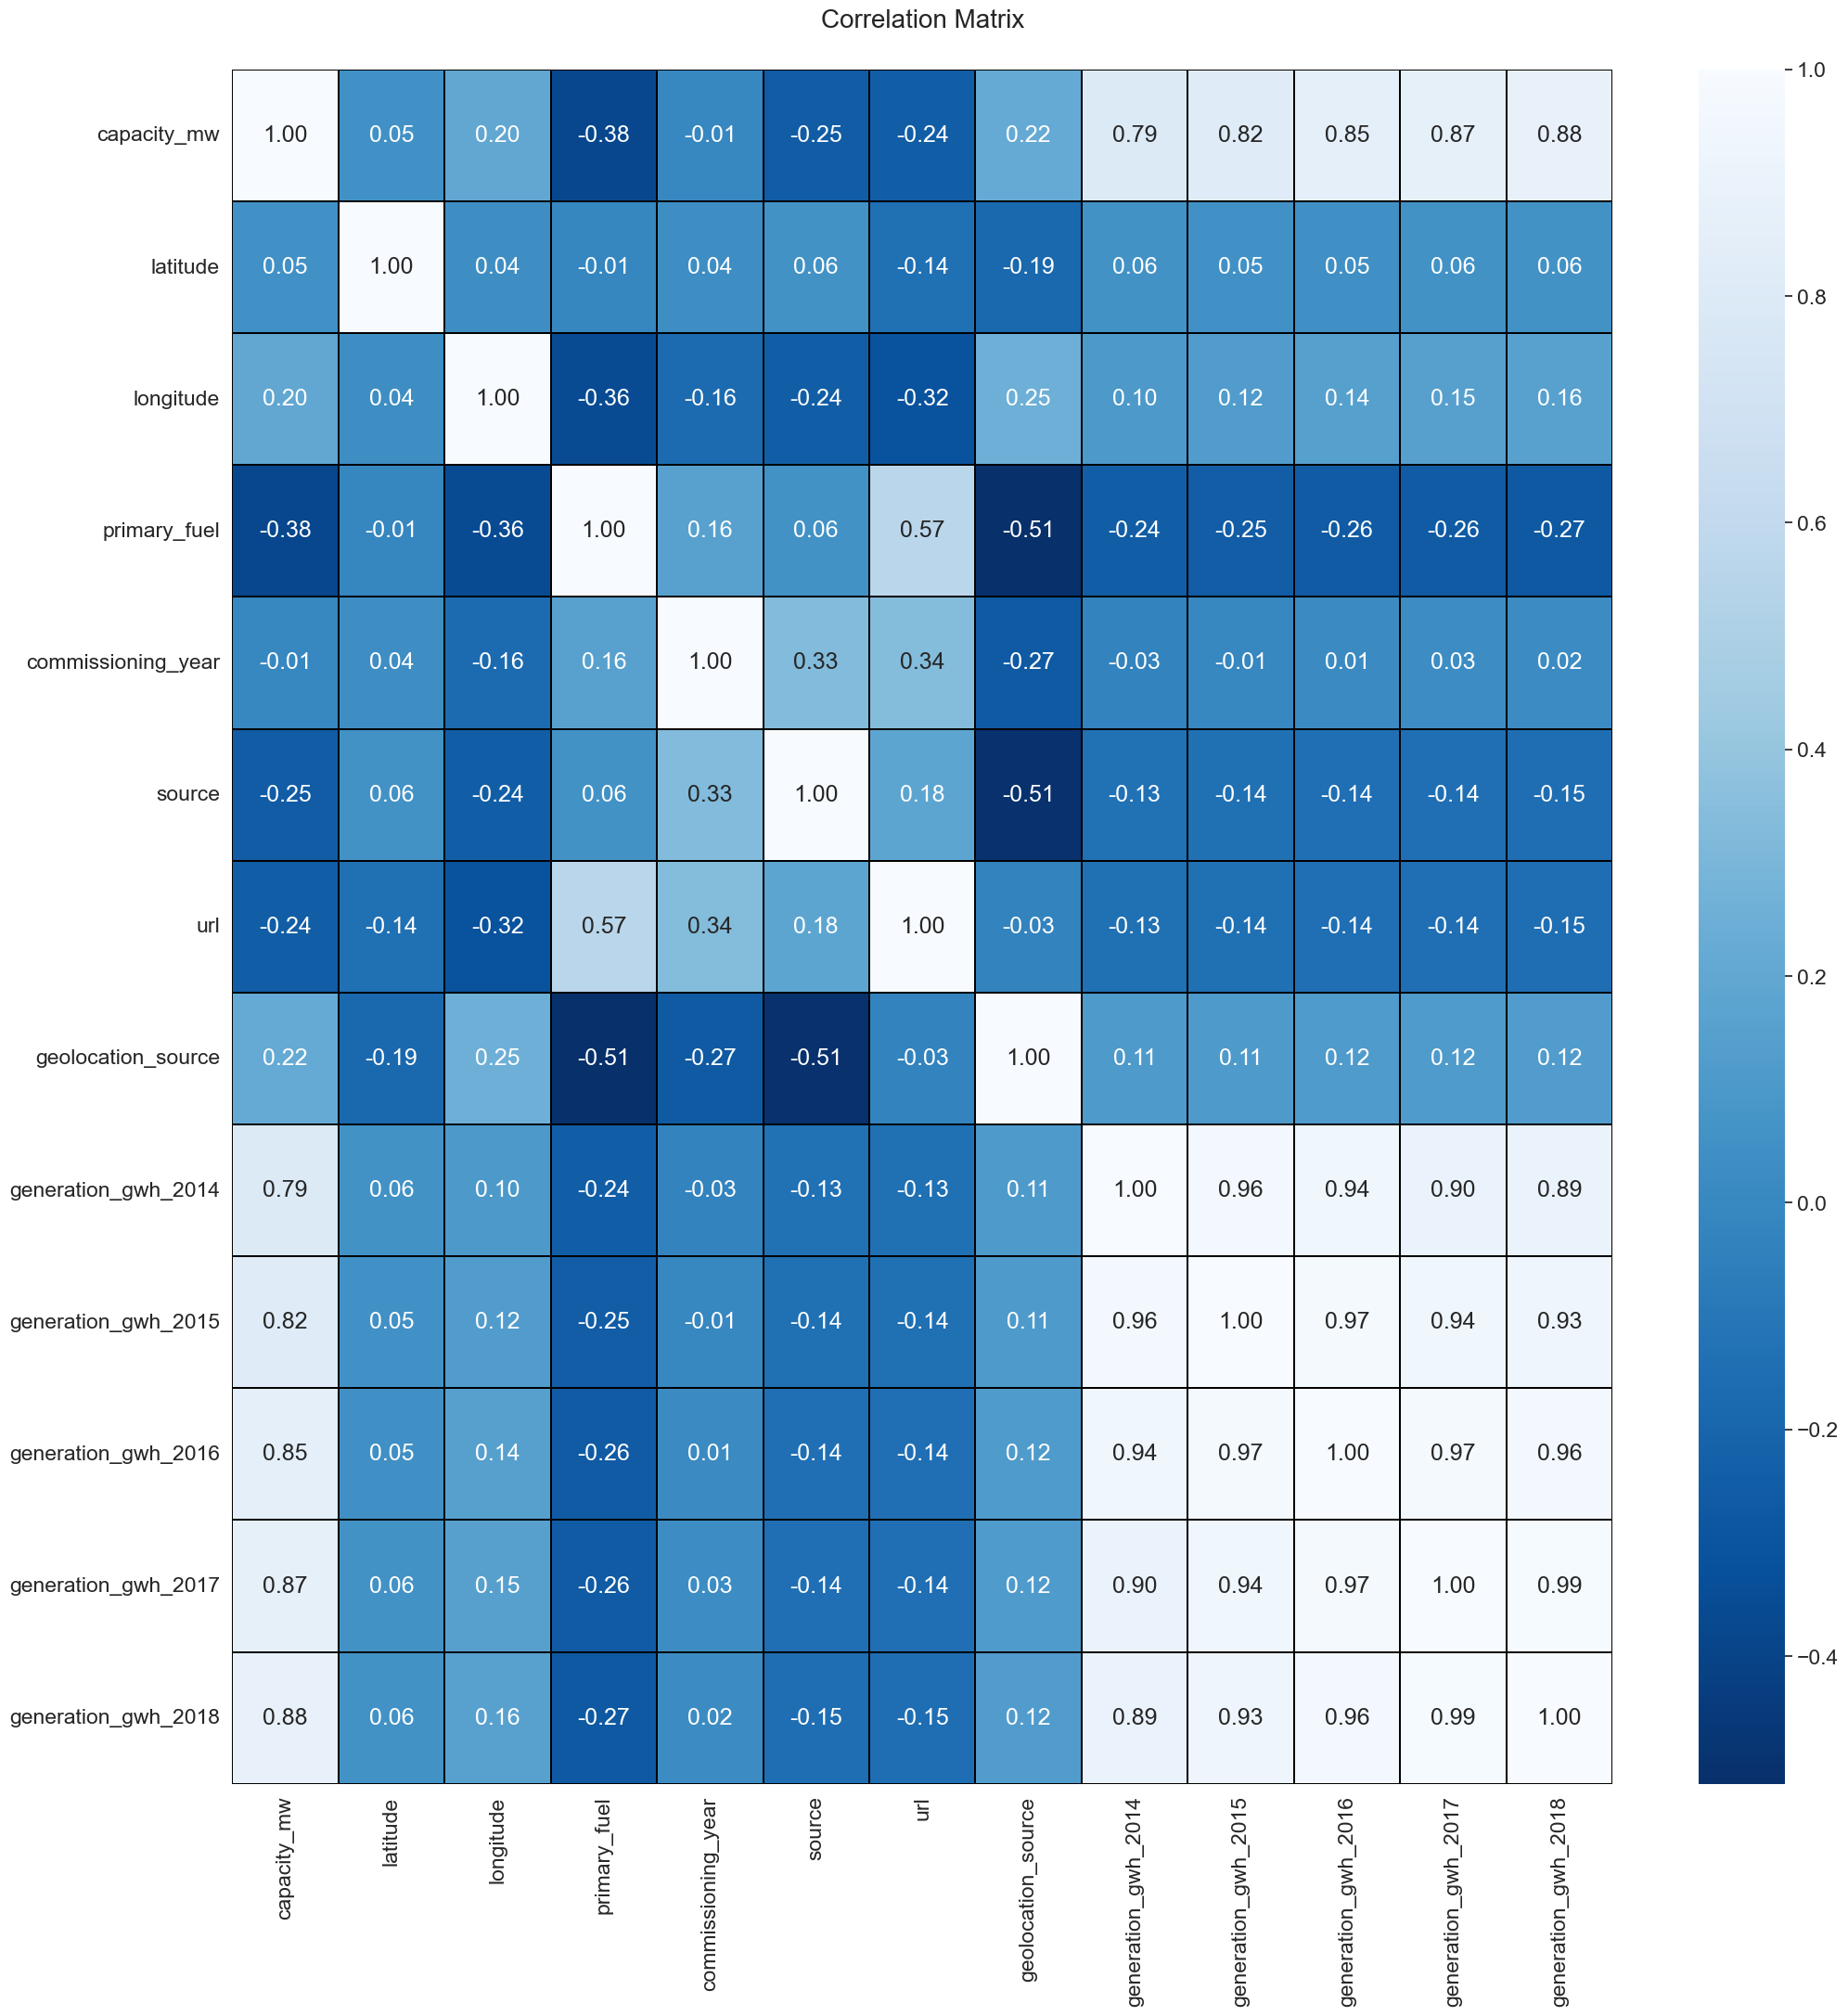

In [98]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

This heatmap shows the correlation matrix. We can observe the relationship between feature-to-feature and feature-to-label.

- This heatmap contains both positive and negative correlations.
- The capacity_mw feature has more correlation with the power generation columns(+0.88) and is negatively correlated with primary_fuel column(-0.38)
- The primary_fuel feature is slightly correlated with geolocation_source(-0.51) and url(+0.57).
- The columns 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' are highly correlated with each other.

# 2. Preprocessing Data
## 2.1 Missing values
In Sections 1.2 and 1.3.2 we manage the missing values in the the dataset.

In [ ]:
df.isnull().sum().sum()

No missing values to remove.

###  ??? 1.2.2 Rows with missing values in target

In [15]:
# Create a mask for rows where all specified columns have missing values
mask = df[['Next_Tmax','Next_Tmin']].isnull().all(axis=1)

# Use the mask to filter the DataFrame and get rows with all missing values
rows_with_all_missing = df[mask]

# Display the resulting rows
print(f"Columns with missing values: {missing_values_col} \nNumber of rows with null values: {rows_with_all_missing.shape[0]}\n")
print("Rows with null values:")
rows_with_all_missing 

Columns with missing values: ['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'Next_Tmax', 'Next_Tmin'] 
Number of rows with null values: 27

Rows with null values:


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
831       7.0  02-08-2013          29.6          25.8    76.202255   
856       7.0  03-08-2013           NaN           NaN    69.476059   
1073     24.0  11-08-2013          34.2          25.1    50.618851   
2465     16.0  05-08-2014          28.8          23.1    71.442566   
3696     22.0  23-07-2015          30.4          23.4    81.568771   
3714     15.0  24-07-2015          24.6          22.4    83.265244   
3739     15.0  25-07-2015           NaN           NaN    68.156593   
3886     12.0  31-07-2015           NaN           NaN    64.559479   
4205      6.0  13-08-2015          30.8          23.9    35.218002   
4230      6.0  14-08-2015           NaN           NaN    43.412582   
4255      6.0  15-08-2015           NaN           NaN    58.784390   
4280      6.0  16-08-2015           NaN           NaN    28.475870   
5656      7.0  09-08-2016          33.1          26.8    64.725151   
5681      7.0  10-08-2016           NaN           NaN    51.469501   
6060     11.0  25-08-2016           NaN           NaN    44.908253   
6268     19.0  02-07-2017          25.6          21.7    84.423805   
6357      8.0  06-07-2017           NaN           NaN    77.332268   
6435     11.0  09-07-2017          28.8          24.5    77.014175   
6907      8.0  28-07-2017          27.5          24.3    54.392185   
7254      5.0  11-08-2017          30.9          23.3    51.226562   
7304      5.0  13-08-2017           NaN           NaN    73.782753   
7344     20.0  14-08-2017          26.2          22.1    85.103630   
7504      5.0  21-08-2017          27.7          23.3    53.629204   
7554      5.0  23-08-2017          30.7          23.7    78.330040   
7571     22.0  23-08-2017          30.2          24.9    76.936493   
7604      5.0  25-08-2017          30.3          21.7    35.563965   
7682      8.0  28-08-2017          26.3          18.1    29.959215   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
831     94.058517         28.842727         26.442801   7.980686   87.715882   
856     93.672600         30.491629         25.081388   6.282423  124.191446   
1073    89.166397         33.414349         27.475249   6.084058   48.521008   
2465    90.695419         26.273760         23.419080   3.787889   41.739802   
3696    93.973579         26.724457         24.984435   5.779299   58.456456   
3714    94.153442         26.738321         24.585545   8.048991   43.391457   
3739    93.874550         28.502294         24.270829   5.819343   35.236471   
3886    86.083702         29.628166         25.745189   8.629767   26.564901   
4205    82.458534         32.241880         23.018172   6.547084   63.516243   
4230    84.317780         32.028639         24.274533   5.880758   54.278856   
4255    79.509987         28.628288         24.045805   4.762958   50.826542   
4280    89.183807         33.651696         21.381762   6.050666   61.250346   
5656    90.769173         31.730979         26.316541   5.095636  127.601342   
5681    88.160759         33.531711         27.066962   4.934146  139.353021   
6060    86.309982         26.065732         21.639797   9.656940   78.263273   
6268    99.652794         24.881373         22.821416   9.236040   41.559663   
6357    89.395378         27.467565         24.160557   7.628294   38.808770   
6435    90.517715         28.321989         24.563500  10.349091   53.364445   
6907    88.281052         30.742290         25.195872   6.311136   44.619934   
7254    85.210350         30.742346         23.130362   5.471810  138.030061   
7304    85.662842         25.370156         21.846991   7.367599   72.823796   
7344    98.765335         21.925545         19.703742  14.541317   45.193849   
7504    94.092056         30.448380         24.038216   5.289254  114.941728   
7554    91.991310         28.959303         24.378045  12.264002   76.349382   
7571    90.509560         29.339601         2

## 2.2  Removing outliers

<!-- df_backup6 = df.copy() -->

In [102]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0       0.561750  1.120269   0.855718      1.261806            0.407562   
1       0.402975  0.572224   0.578535      0.943665            0.663795   
2       0.500734  0.113195   1.639177      1.702901            0.663795   
3       0.341461  0.428686   2.814837      0.502571            0.040846   
4       2.426707  0.122255   1.001569      0.943665            0.663795   
..           ...       ...        ...           ...                 ...   
902     2.094194  0.786246   0.021900      0.943665            0.727854   
903     0.560919  1.331741   0.141902      1.261806            0.663795   
904     0.523511  0.949668   0.381612      1.702901            0.663795   
905     0.432902  0.505466   0.753013      0.943665            0.663795   
906     0.538474  1.806212   0.002409      1.702901            0.663795   

       source       url  geolocation_source  generation_gwh_2014  \
0    1.420779  0.534283            1.039322             0.266079   
1    2.855426  1.192348            0.406326             0.266079   
2    0.521513  1.605551            0.406326             0.266079   
3    0.499441  0.506377            0.406326             0.330394   
4    0.499441  0.506377            0.406326             0.517769   
..        ...       ...                 ...                  ...   
902  0.499441  0.506377            0.406326             0.266079   
903  0.714491  1.057315            2.484971             0.266079   
904  0.521513  2.370742            0.406326             0.266079   
905  0.317204  0.139085            0.406326             0.266079   
906  0.521513  2.187096            0.406326             0.266079   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.276982             0.284430             0.285157   
1               0.276982             0.284430             0.285157   
2               0.276982             0.284430             0.285157   
3               0.233578             0.236028             0.334639   
4               1.427261             1.506540             1.180562   
..                   ...                  ...                  ...   
902             0.509506             0.448248             0.269939   
903             0.276982             0.284430             0.285157   
904             0.276982             0.284430             0.285157   
905             0.276982             0.284430             0.285157   
906             0.276982             0.284430             0.285157   

     generation_gwh_2018  
0               0.298002  
1               0.298002  
2               0.298002  
3               0.336698  
4               1.716157  
..                   ...  
902             0.318104  
903             0.298002  
904             0.298002  
905             0.298002  
906             0.298002  

[861 rows x 13 columns]

In [103]:
# threshold = 3.2
df_new = df[(z<3.2).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df


39 rows with outliers were deleted.
This represent 4.53% of the data.
In the new dataset there are 822 rows and 13 columns.


capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407           6.0              2011.0   
1           98.0   24.7663    74.6090           1.0              2015.0   
2           39.2   21.9038    69.3732           7.0              2015.0   
3          135.0   23.8712    91.3602           2.0              2004.0   
4         1800.0   21.9603    82.4091           1.0              2015.0   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568           1.0              2016.0   
903          3.0   12.8932    78.1654           6.0              2015.0   
904         25.5   15.2758    75.5811           7.0              2015.0   
905         80.0   24.3500    73.7477           1.0              2015.0   
906         16.5    9.9344    77.4768           7.0              2015.0   

     source    url  geolocation_source  generation_gwh_2014  \
0     109.0  126.0                 1.0           801.123775   
1     174.0  169.0                 2.0           801.123775   
2      21.0  196.0                 2.0           801.123775   
3      22.0   58.0                 2.0           617.789264   
4      22.0   58.0                 2.0          3035.550000   
..      ...    ...                 ...                  ...   
902    22.0   58.0                 2.0           801.123775   
903    77.0   22.0                 0.0           801.123775   
904    21.0  246.0                 2.0           801.123775   
905    59.0   82.0                 2.0           801.123775   
906    21.0  234.0                 2.0           801.123775   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             711.181225           737.205450           817.977250   
1             711.181225           737.205450           817.977250   
2             711.181225           737.205450           817.977250   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903           711.181225           737.205450           817.977250   
904           711.181225           737.205450           817.977250   
905           711.181225           737.205450           817.977250   
906           711.181225           737.205450           817.977250   

     generation_gwh_2018  
0             751.644375  
1             751.644375  
2             751.644375  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903           751.644375  
904           751.644375  
905           751.644375  
906           751.644375  

[822 rows x 13 columns]

Since our dataset is small threshold was defined as 3.2 instead of 3. Therefore only 4.53% of the data was lost.

## 2.4 Skewness Correction

We will modify the columns' names for a better approach.

In [104]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
generation_gwh_2014  2.967593
generation_gwh_2015  2.778447
generation_gwh_2016  2.721960
generation_gwh_2018  2.612044
generation_gwh_2017  2.578939
capacity_mw          1.939367
source               1.710468
url                  1.445080
longitude            1.048897
primary_fuel         0.452163
latitude            -0.125642
commissioning_year  -1.549968
geolocation_source  -1.995053

We are going to select which features have a skew greater than 0.5 and apply transform methods to those features in order to eliminate the skewness.

In [105]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['capacity_mw',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'longitude',
 'source',
 'url']

In [106]:
# The categorical variables will not be taken into account, nor longitude.
skew_columns.remove('source')
skew_columns.remove('url')
skew_columns.remove('longitude')

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [107]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

We will select the best transformation method looking for the minimum absolute value of skewness.

In [108]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Check the calculated skeweness for 
display(df_comp[df_comp['feature'] == 'generation_gwh_2018'] )

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

index  Skewness              feature  Skewness_abs
0  generation_gwh_2018_sqrt  1.413233  generation_gwh_2018      1.413233
1   generation_gwh_2018_log       NaN  generation_gwh_2018           NaN
2  generation_gwh_2018_cbrt  0.444969  generation_gwh_2018      0.444969

index  Skewness              feature  Skewness_abs
23               capacity_mw  1.939367             capacity      1.939367
22          capacity_mw_cbrt  0.810477          capacity_mw      0.810477
7        generation_gwh_2017  2.578939       generation_gwh      2.578939
18  generation_gwh_2014_cbrt  0.436373  generation_gwh_2014      0.436373
14  generation_gwh_2015_cbrt  0.548535  generation_gwh_2015      0.548535
10  generation_gwh_2016_cbrt  0.521326  generation_gwh_2016      0.521326
6   generation_gwh_2017_cbrt  0.377501  generation_gwh_2017      0.377501
2   generation_gwh_2018_cbrt  0.444969  generation_gwh_2018      0.444969

For each skewness column, we obtain the better transform method. We can observe that for columns capacity_mw, generation_gwh_2014,  generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018 is better to apply the cube-root transform method.
<!-- For longitude we will apply the log transform method. -->

In [109]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])

['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [110]:
# Transform the capacity_mw column
df['capacity_mw_cat'] = np.cbrt(df['capacity_mw'])

The transformation to the capacity mw column will be stored in a different column in order to only be considered in the classification model since this is the target variable in the regression model.

In [111]:
# This is the new skewness for the transformed columns
skew_columns.remove('capacity_mw')
skew_columns = skew_columns + ['capacity_mw_cat']
df[skew_columns].skew()

generation_gwh_2014    0.436373
generation_gwh_2015    0.548535
generation_gwh_2016    0.521326
generation_gwh_2017    0.377501
generation_gwh_2018    0.444969
capacity_mw_cat        0.810477
dtype: float64

After update the df dataset with the transform data with cube-root method, we can continue with the analysis.

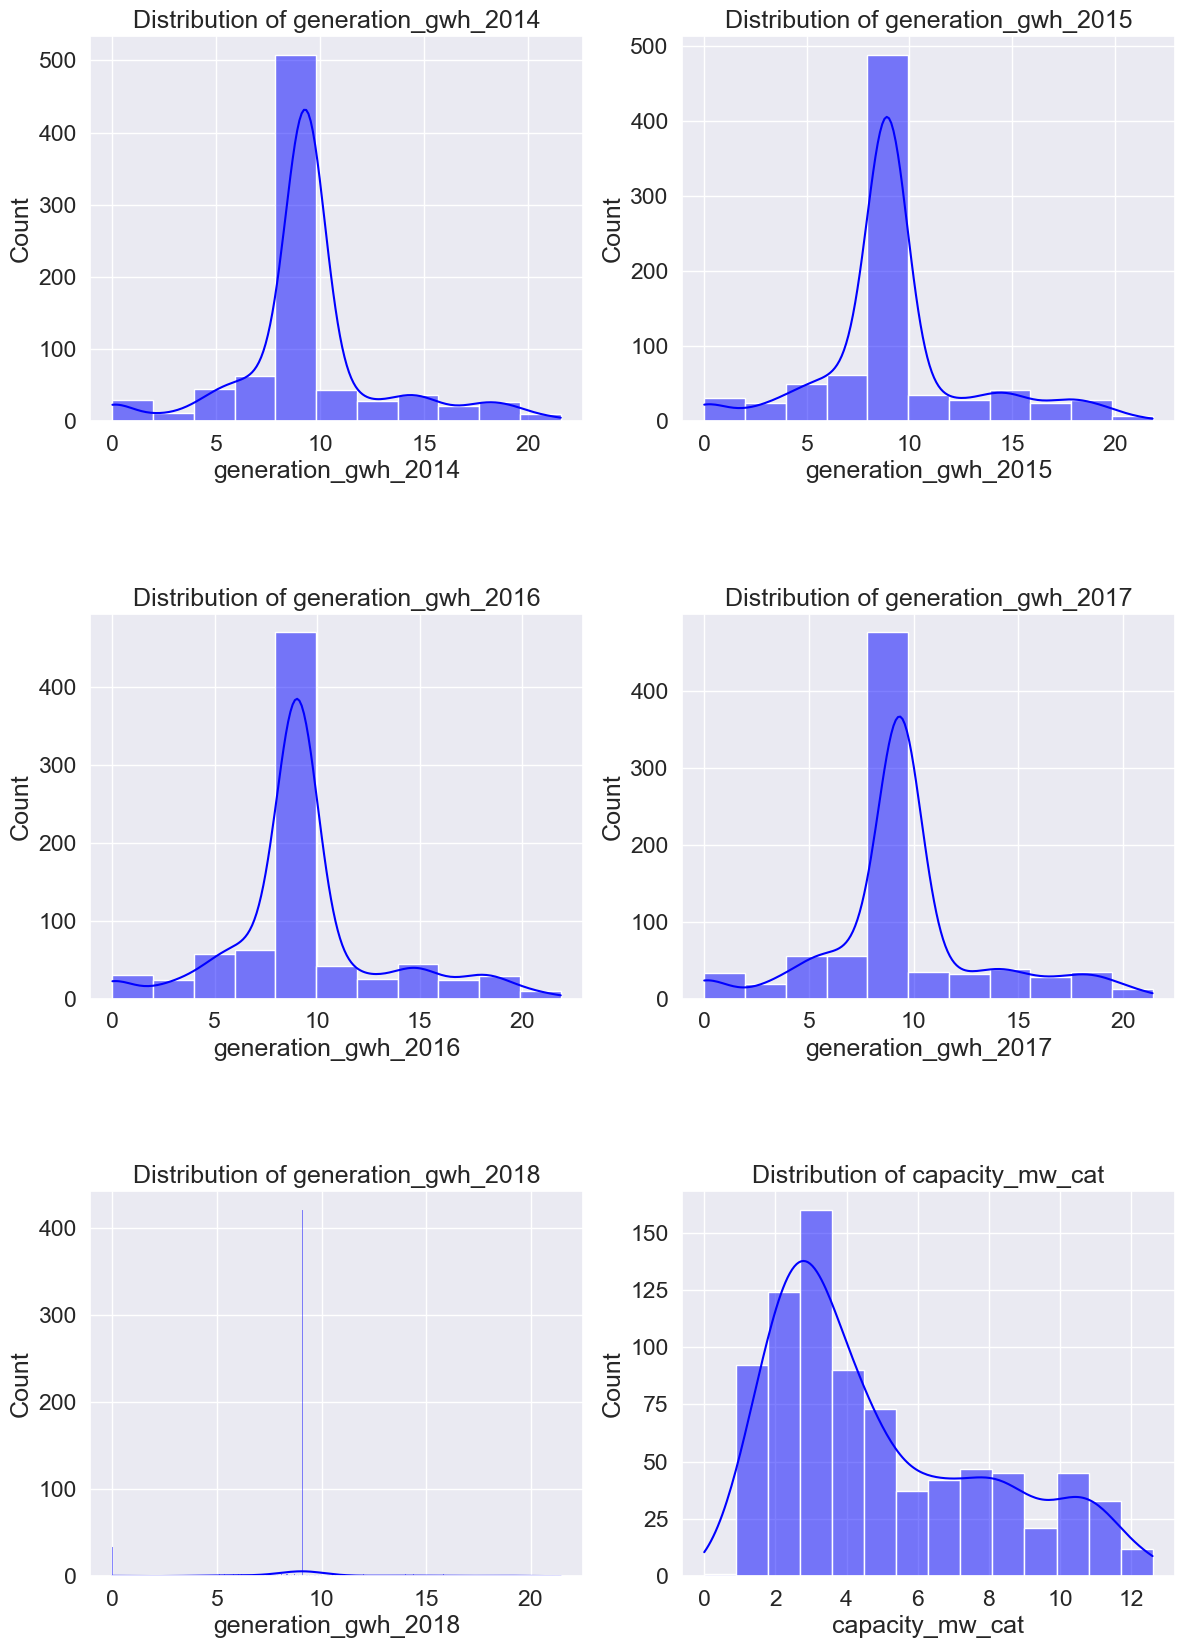

In [112]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(3, 2, figsize=(14, 20))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='blue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label
#### 2.5.1.1 Separating features for regression model to predict capacity in mega-watts

In [113]:
# Separating the independent and target variables into x and y 
col = ['capacity_mw', 'capacity_mw_cat'] #capacity_mw_cat variable -> classification model
x = df.drop(col, axis=1)
y = df['capacity_mw']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (822, 12)
Label Dimension = (822,)


latitude  longitude  primary_fuel  commissioning_year  source    url  \
0   28.1839    73.2407           6.0              2011.0   109.0  126.0   
1   24.7663    74.6090           1.0              2015.0   174.0  169.0   
2   21.9038    69.3732           7.0              2015.0    21.0  196.0   
3   23.8712    91.3602           2.0              2004.0    22.0   58.0   
4   21.9603    82.4091           1.0              2015.0    22.0   58.0   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                 1.0             9.287522             8.926066   
1                 2.0             9.287522             8.926066   
2                 2.0             9.287522             8.926066   
3                 2.0             8.516872             9.449397   
4                 2.0            14.479241            18.086385   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0             9.033641             9.352199             9.092238  
1             9.033641             9.352199             9.092238  
2             9.033641             9.352199             9.092238  
3             9.604586             8.723154             8.555526  
4            18.413278            17.528476            19.380155

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

#### 2.5.1.2 Separating features for classification model to predict Primary fuel

In [114]:
# Separating the independent and target variables into x and y 
col = ['primary_fuel', 'capacity_mw'] #capacity_mw is represented by capacity_mw_cat
x2 = df.drop(col, axis=1)
y2 = df['primary_fuel']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (822, 12)
Label Dimension = (822,)


latitude  longitude  commissioning_year  source    url  geolocation_source  \
0   28.1839    73.2407              2011.0   109.0  126.0                 1.0   
1   24.7663    74.6090              2015.0   174.0  169.0                 2.0   
2   21.9038    69.3732              2015.0    21.0  196.0                 2.0   
3   23.8712    91.3602              2004.0    22.0   58.0                 2.0   
4   21.9603    82.4091              2015.0    22.0   58.0                 2.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0             9.287522             8.926066             9.033641   
1             9.287522             8.926066             9.033641   
2             9.287522             8.926066             9.033641   
3             8.516872             9.449397             9.604586   
4            14.479241            18.086385            18.413278   

   generation_gwh_2017  generation_gwh_2018  capacity_mw_cat  
0             9.352199             9.092238         1.357209  
1             9.352199             9.092238         4.610436  
2             9.352199             9.092238         3.396999  
3             8.723154             8.555526         5.129928  
4            17.528476            19.380155        12.164404

array([6., 1., 7., 2., 3., 0., 5., 4.])

### 2.5.2 Scaling
### 2.5.2.1 Scaling the data for regression model

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model {'*'*30}")
display(x.head())



****************************** x features for regression model ******************************


latitude  longitude  primary_fuel  commissioning_year    source       url  \
0  1.116903  -0.851090      1.219893            0.391419  1.385734  0.502204   
1  0.572628  -0.559955     -0.965704            0.663049  2.804147  1.149033   
2  0.116756  -1.673983      1.657013            0.663049 -0.534580  1.555181   
3  0.430077   3.004218     -0.528585           -0.083934 -0.512758 -0.520687   
4  0.125754   1.099682     -0.965704            0.663049 -0.512758 -0.520687   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0           -1.000601            -0.060972            -0.087240   
1            0.417492            -0.060972            -0.087240   
2            0.417492            -0.060972            -0.087240   
3            0.417492            -0.276639             0.052473   
4            0.417492             1.391936             2.358274   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            -0.085355            -0.061708            -0.090535  
1            -0.085355            -0.061708            -0.090535  
2            -0.085355            -0.061708            -0.090535  
3             0.063696            -0.222945            -0.224969  
4             2.363299             2.034036             2.486367

### 2.5.2.2 Scaling the data for classification model

In [116]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for classification model {'*'*30}")
display(x2.head())



****************************** x2 features for classification model ******************************


latitude  longitude  commissioning_year    source       url  \
0  1.116903  -0.851090            0.391419  1.385734  0.502204   
1  0.572628  -0.559955            0.663049  2.804147  1.149033   
2  0.116756  -1.673983            0.663049 -0.534580  1.555181   
3  0.430077   3.004218           -0.083934 -0.512758 -0.520687   
4  0.125754   1.099682            0.663049 -0.512758 -0.520687   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0           -1.000601            -0.060972            -0.087240   
1            0.417492            -0.060972            -0.087240   
2            0.417492            -0.060972            -0.087240   
3            0.417492            -0.276639             0.052473   
4            0.417492             1.391936             2.358274   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0            -0.085355            -0.061708            -0.090535   
1            -0.085355            -0.061708            -0.090535   
2            -0.085355            -0.061708            -0.090535   
3             0.063696            -0.222945            -0.224969   
4             2.363299             2.034036             2.486367   

   capacity_mw_cat  
0        -1.179511  
1        -0.101496  
2        -0.503590  
3         0.070647  
4         2.401646

## 2.6 Muticollinearity Analysis and Feature Selection


### 2.6.1 Checking Variance Inflation Factor (VIF)

#### 2.6.1.1 Checking VIF for regression model (AveragePrice)

In [117]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
9   generation_gwh_2016   12.018421
10  generation_gwh_2017   10.204765
11  generation_gwh_2018    9.568766
8   generation_gwh_2015    6.983796
7   generation_gwh_2014    3.684794
2          primary_fuel    3.671032
6    geolocation_source    3.294658
5                   url    2.681991
4                source    2.053721
3    commissioning_year    1.388439
1             longitude    1.259516
0              latitude    1.072793

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features:  
- generation_gwh_2016
- generation_gwh_2017
have VIF value greater than 10 which means they have high correlation with each other. 

We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.


In [118]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'capacity_mw') & (corr_df['Feature B'].isin(['generation_gwh_2016', 'generation_gwh_2017'])) ]

Feature A            Feature B  Corr coef
36  capacity_mw  generation_gwh_2017   0.868406
37  capacity_mw  generation_gwh_2016   0.852897

<!-- # Saving a backup of x
x_backup = x.copy() -->

In [120]:
# Dropping the columns with multicollinearity
x = x.drop(['generation_gwh_2016'], axis=1) 

We drop the column 'generation_gwh_2016' to solve the multicollinearity problem since is less correlated with the target than generation_gwh_2017.

In [121]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
10  generation_gwh_2018    8.962801
9   generation_gwh_2017    8.827324
8   generation_gwh_2015    4.693430
7   generation_gwh_2014    3.684242
2          primary_fuel    3.667161
6    geolocation_source    3.293785
5                   url    2.681559
4                source    2.051045
3    commissioning_year    1.367804
1             longitude    1.248896
0              latitude    1.071716

Dropping the generation_gwh_2016 column solved the multicollinearity issue. We can now move ahead with model building. 

## 2.7 Balancing the Dataset for Classification model
The dataset is imbalance. So, we are going to apply SMOTE for oversampling the data.

In [122]:
# Count the frequencies of target
target_counts = y2.value_counts().to_frame()
target_counts

primary_fuel
1.0           230
3.0           221
6.0           123
7.0           108
2.0            65
0.0            49
5.0            17
4.0             9

In [123]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x2, y2)

In [124]:
# Count the frequencies of target
target_counts = y1.value_counts().to_frame()
target_counts

primary_fuel
6.0           230
1.0           230
7.0           230
2.0           230
3.0           230
0.0           230
5.0           230
4.0           230

In [125]:
# Setting X and Y for the classification model
X = x1
Y = y1

Since the data is balanced, we can build machine learning classification models. Section 4

# 3. Modeling for predicting AveragePrice

In [126]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

## 3.1 Finding the best random state

In [127]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
#         print(f"{i}: acc = {acc}")
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [128]:
# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.6782 at random_state 5


Metrics: Mean Square Error (MSE): measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.

## 3.2 Creating train test split

In [129]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (575, 11)
x_test shape:   (247, 11)
y_train shape:  (575,)
y_test shape:   (247,)


## 3.3 Regression Algoritms

In [130]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['id', 'Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

In [131]:
eval_model

Empty DataFrame
Columns: [id, Model, RMSE, R2_Score(test), CV_Mean]
Index: []

### 3.3.1 Linear Regression

In [132]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

LR coef_        : [  -3.57494383    7.93801065 -119.38279034   25.33574928 -123.68830431
  -26.27245318  -23.81410089    4.32690454   44.95703322   78.68547364
  108.43514141]

LR intercept_ : 279.64905880506717
LR score train  : 0.5105949413935515
LR score test   : 0.6782349347043766
********** E R R O R **********
Mean squared error: 63679.2252
Root Mean squared error: 252.3474
Cross-validation results (R2): [ 0.62422589  0.31388798 -0.05754497  0.70051232  0.44778804  0.50597737
  0.6228303   0.54352963  0.58251909  0.59477872]
Average R2: 0.4879
R2_Score(test): 0.6782


### 3.3.2 Random Forest Regressor

In [133]:
%%time
# Create the model
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

Wall time: 26 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=5)

In [134]:
random_search.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=110)

In [135]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = eval_model.append(model_scores, ignore_index=True)

Best parameters : {'n_estimators': 110, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 30, 'bootstrap': True}
Best score : 0.7572196735373851
Best Estimator:  RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=110)
********** E R R O R **********
Mean squared error: 26137.1421
Root Mean squared error: 161.6699
Cross-validation results (R2): 0.7572196735373851
Average R2: 0.7572
R2_Score(test): 0.8679


### 3.3.3 Decision Tree Regressor

In [136]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 94866.8835
Root Mean squared error: 308.0047
Cross-validation results (R2): [0.61969385 0.53743375 0.59752498 0.66749757 0.61049817]
Average R2: 0.6065
R2_Score(test): 0.5206


### 3.3.4 K Neighbors Regressor

In [137]:
# Create the KNN model
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 32423.8697
Root Mean squared error: 180.0663
Cross-validation results (R2): [0.74297304 0.82634177 0.67316657 0.76584837 0.7098125 ]
Average R2: 0.7436
R2_Score(test): 0.8362


### 3.3.5 Gradient Boosting Regressor

In [138]:
%%time
# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 52469.2038
Root Mean squared error: 229.0616
Cross-validation results (R2): [0.73374123 0.83359571 0.69666825 0.71184528 0.74103776]
Average R2: 0.7434
R2_Score(test): 0.7349
Wall time: 1.43 s


### 3.3.6 Lasso

In [139]:
%%time
# Create the Lasso model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 63613.5980
Root Mean squared error: 252.2174
Cross-validation results (R2): [0.48294099 0.53462772 0.47920633 0.60398659 0.58240579]
Average R2: 0.5366
R2_Score(test): 0.6786
Wall time: 71.9 ms


### 3.3.7 Ridge

In [140]:
%%time 
# Create the Ridge model
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 63664.1266
Root Mean squared error: 252.3175
Cross-validation results (R2): [0.47222755 0.5337627  0.47901402 0.60480714 0.58020866]
Average R2: 0.5340
R2_Score(test): 0.6783
Wall time: 76.1 ms


### 3.3.8 Support Vector Regressor

In [141]:
%%time
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = eval_model.append(model_scores, ignore_index=True)

********** E R R O R **********
Mean squared error: 224870.4159
Root Mean squared error: 474.2050
Cross-validation results (R2): [-0.10845838 -0.10061165 -0.16381788 -0.18145969 -0.15799779]
Average R2: -0.1425
R2_Score(test): -0.1362
Wall time: 505 ms


In [142]:
# Calculate the difference between R2 score and cross-validation score 
eval_model['Dif_R2_CVmean'] = eval_model['R2_Score(test)'] - eval_model['CV_Mean']

# Presenting the results ordered
eval_model.sort_values(['CV_Mean','Dif_R2_CVmean'], ascending=[False,True])

id  \
1      Random Forest Regressor   
3        K Neighbors Regressor   
4  Gradient Boosting Regressor   
2      Decision Tree Regressor   
5                        Lasso   
6                        Ridge   
0             LinearRegression   
7                          SVR   

                                               Model        RMSE  \
1  (DecisionTreeRegressor(max_depth=30, max_featu...  161.669855   
3                              KNeighborsRegressor()  180.066293   
4  ([DecisionTreeRegressor(criterion='friedman_ms...  229.061572   
2              DecisionTreeRegressor(random_state=5)  308.004681   
5                                            Lasso()  252.217363   
6                                            Ridge()  252.317511   
0                                 LinearRegression()  252.347429   
7                                              SVR()  474.205036   

   R2_Score(test)   CV_Mean  Dif_R2_CVmean  
1        0.867932  0.757220       0.110712  
3        0.836165  0.743628       0.092537  
4        0.734878  0.743378      -0.008500  
2        0.520647  0.606530      -0.085883  
5        0.678567  0.536633       0.141933  
6        0.678311  0.534004       0.144307  
0        0.678235  0.487850       0.190384  
7       -0.136249 -0.142469       0.006220

From the summary of models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

## 3.4 Hyper Parameter Tuning
### 3.4.1 Finding the best parameters for Linear Regression

In [143]:
random_state

5

In [144]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

Wall time: 7.4 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=5, scoring='neg_mean_squared_error')

In [145]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 110,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_depth': 30,
 'bootstrap': True}

These are the best parameters for training the model.

In [146]:
best_model

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=110)

## 3.5 Final Model

In [147]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=110)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 86.81%


### 3.6.1 Saving the model

In [148]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/capacitymw_regressor_model.pkl")

['models/capacitymw_regressor_model.pkl']

### 3.6.2  Predicting the saved model

In [149]:
# Lets load the saved model and get the predictions
model = joblib.load("models/capacitymw_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 86.809 %


0          1         2           3          4          5    \
Predicted  514.542361  20.073374  31.19249  266.411543   6.598955  18.859105   
Original   412.020000  16.000000  10.00000   96.000000  40.000000   3.000000   

                   6          7           8           9    ...        237  \
Predicted  1237.534907  58.267317   76.430366  205.964674  ...  63.725129   
Original   1200.000000  10.500000  140.000000  240.000000  ...  45.000000   

                 238          239          240         241        242  \
Predicted  23.112847  1363.221342  1375.846101  300.730312  20.243733   
Original   11.200000  1240.000000  1980.000000  388.500000  20.000000   

                 243         244       245         246  
Predicted  11.093238  795.559052  96.45986  208.132329  
Original    5.000000  422.000000  55.00000  101.000000  

[2 rows x 247 columns]

These are the predicted values in a dataset to compared the prediction with the test data with R2 score 86.81%. 

# 4. Modeling for predicting region

## 4.1 Finding the best random state

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [151]:
%%time
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9511 at random_state 63
Wall time: 1min 22s


Best accuracy is 95.11% at random_state 63

## 4.2 Creating train test split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (1288, 12)
x_test shape:   (552, 12)
y_train shape:  (1288,)
y_test shape:   (552,)


## 4.3 Classification Algorithms¶

In [153]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc
from sklearn.model_selection import cross_val_score

In [154]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [155]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred_dict = {}
    

### 4.3.1 RandomForestClassifier

In [156]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[64  1  0  0  0  0  0  0]
 [ 4 44  3  4  1  1  0  0]
 [ 2  4 78  0  0  1  0  0]
 [ 0  4  1 69  0  0  0  0]
 [ 0  0  0  1 70  0  0  0]
 [ 0  1  0  0  0 59  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        65
         1.0       0.81      0.77      0.79        57
         2.0       0.95      0.92      0.93        85
         3.0       0.93      0.93      0.93        74
         4.0       0.99      0.99      0.99        71
         5.0       0.97      0.98      0.98        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.95       552
   macro avg       0.95      0.95      0.95       552
weighted avg       0.95      0.95      0.95       552

Training Accuracy using RandomForestClassifier is 100.00

### 4.3.2 Extra Trees Classifier

In [157]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[64  1  0  0  0  0  0  0]
 [ 4 46  5  1  1  0  0  0]
 [ 1  3 80  0  0  1  0  0]
 [ 0  2  1 71  0  0  0  0]
 [ 0  1  0  1 69  0  0  0]
 [ 0  0  0  0  0 60  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        65
         1.0       0.87      0.81      0.84        57
         2.0       0.93      0.94      0.94        85
         3.0       0.97      0.96      0.97        74
         4.0       0.99      0.97      0.98        71
         5.0       0.98      1.00      0.99        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.96       552
   macro avg       0.96      0.96      0.96       552
weighted avg       0.96      0.96      0.96       552

Training Accuracy using ExtraTreesClassifier is 100.00%
Th

### 4.3.3 Logistic Regression

In [158]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[62  0  0  0  0  2  0  1]
 [ 8 30  3  7  8  0  0  1]
 [ 1 11 29 27  4 13  0  0]
 [ 3 10  2 54  2  3  0  0]
 [ 0  3  0  9 59  0  0  0]
 [ 2  5  0  2  0 49  0  2]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        65
         1.0       0.51      0.53      0.52        57
         2.0       0.85      0.34      0.49        85
         3.0       0.55      0.73      0.62        74
         4.0       0.81      0.83      0.82        71
         5.0       0.73      0.82      0.77        60
         6.0       1.00      1.00      1.00        67
         7.0       0.95      1.00      0.97        73

    accuracy                           0.77       552
   macro avg       0.78      0.77      0.76       552
weighted avg       0.78      0.77      0.76       552

Training Accuracy using LogisticRegression is 78.65%
The acc

### 4.3.4 Support Vector Machine Classifier

In [159]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: SVC
Confusion matrix: 
 [[63  0  0  0  0  1  0  1]
 [ 6 38  4  3  5  0  0  1]
 [ 1  5 59 10  1  8  0  1]
 [ 2  4  4 63  1  0  0  0]
 [ 0  0  0  1 70  0  0  0]
 [ 5  2  0  1  0 50  0  2]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        65
         1.0       0.78      0.67      0.72        57
         2.0       0.88      0.69      0.78        85
         3.0       0.81      0.85      0.83        74
         4.0       0.91      0.99      0.95        71
         5.0       0.85      0.83      0.84        60
         6.0       1.00      1.00      1.00        67
         7.0       0.94      1.00      0.97        73

    accuracy                           0.88       552
   macro avg       0.87      0.88      0.87       552
weighted avg       0.87      0.88      0.87       552

Training Accuracy using SVC is 88.04%
The accuracy score using SVC is 87.5%

### 4.3.5 Gradient Boosting Classifier

In [160]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[64  1  0  0  0  0  0  0]
 [ 4 47  2  3  1  0  0  0]
 [ 2  4 74  2  1  2  0  0]
 [ 0  3  3 67  1  0  0  0]
 [ 0  1  0  1 69  0  0  0]
 [ 0  2  2  1  0 55  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.95        65
         1.0       0.81      0.82      0.82        57
         2.0       0.91      0.87      0.89        85
         3.0       0.91      0.91      0.91        74
         4.0       0.96      0.97      0.97        71
         5.0       0.96      0.92      0.94        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.93       552
   macro avg       0.93      0.93      0.93       552
weighted avg       0.94      0.93      0.93       552

Training Accuracy using GradientBoostingClassifier i

### 4.3.6 AdaBoost Classifier

In [161]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[ 0 63  0  0  0  0  0  2]
 [ 0 51  0  0  0  0  0  6]
 [ 0 85  0  0  0  0  0  0]
 [ 0 74  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0]
 [ 0 59  0  0  0  0  0  1]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        65
         1.0       0.13      0.89      0.22        57
         2.0       0.00      0.00      0.00        85
         3.0       0.00      0.00      0.00        74
         4.0       0.00      0.00      0.00        71
         5.0       0.00      0.00      0.00        60
         6.0       1.00      1.00      1.00        67
         7.0       0.89      1.00      0.94        73

    accuracy                           0.35       552
   macro avg       0.25      0.36      0.27       552
weighted avg       0.25      0.35      0.27       552

Training Accuracy using AdaBoostClassifier is 37.73%
The acc

### 4.3.7 Bagging Classifier

In [162]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred_dict[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[63  2  0  0  0  0  0  0]
 [ 3 48  2  3  0  1  0  0]
 [ 2  5 75  3  0  0  0  0]
 [ 0  5  2 67  0  0  0  0]
 [ 0  0  0  1 70  0  0  0]
 [ 0  2  1  0  0 57  0  0]
 [ 0  0  0  0  0  0 67  0]
 [ 0  0  0  0  0  0  0 73]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95        65
         1.0       0.77      0.84      0.81        57
         2.0       0.94      0.88      0.91        85
         3.0       0.91      0.91      0.91        74
         4.0       1.00      0.99      0.99        71
         5.0       0.98      0.95      0.97        60
         6.0       1.00      1.00      1.00        67
         7.0       1.00      1.00      1.00        73

    accuracy                           0.94       552
   macro avg       0.94      0.94      0.94       552
weighted avg       0.94      0.94      0.94       552

Training Accuracy using BaggingClassifier is 99.69%
The accur

## 4.4 Comparing models
### 4.4.1 Comparing accuracy of each model

In [163]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

id  \
1        ExtraTreesClassifier   
0      RandomForestClassifier   
6           BaggingClassifier   
4  GradientBoostingClassifier   
3                         SVC   
2          LogisticRegression   
5          AdaBoostClassifier   

                                               Model  Training Accuracy  \
1  (ExtraTreeClassifier(random_state=1306642526),...           1.000000   
0  (DecisionTreeClassifier(max_features='auto', r...           1.000000   
6  (DecisionTreeClassifier(random_state=146321140...           0.996894   
4  ([DecisionTreeRegressor(criterion='friedman_ms...           0.999224   
3                                              SVC()           0.880435   
2                               LogisticRegression()           0.786491   
5  (DecisionTreeClassifier(max_depth=1, random_st...           0.377329   

   Model Accuracy Score  
1              0.960145  
0              0.949275  
6              0.942029  
4              0.934783  
3              0.875000  
2              0.766304  
5              0.346014

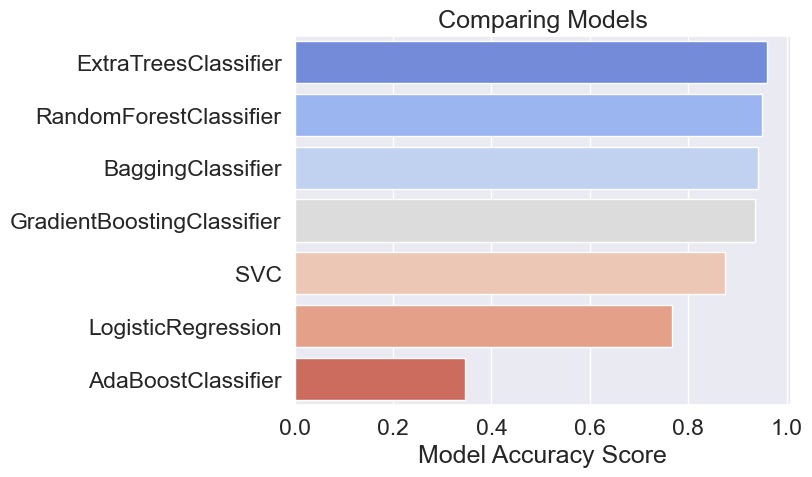

In [164]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='coolwarm')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

The models with the best accuracy are **ExtraTreesClassifier** with 96.014% and **RandomForestClassifier** with 94.927% of accuracy.

### 4.4.2 Cross validation score
In order to evaluate the performance of the models we are going to user Cross-validation technique.

In [165]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [166]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [167]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred_dict[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff
    


::: Model: RandomForestClassifier::: 
score:[0.91847826 0.93478261 0.94021739 0.92119565 0.93206522]
Score mean: 0.9293
Difference between Accuracy score and cross validation score is 0.0199

::: Model: ExtraTreesClassifier::: 
score:[0.92663043 0.94565217 0.93478261 0.93478261 0.92934783]
Score mean: 0.9342
Difference between Accuracy score and cross validation score is 0.0259

::: Model: LogisticRegression::: 
score:[0.7798913  0.79076087 0.79347826 0.77717391 0.79619565]
Score mean: 0.7875
Difference between Accuracy score and cross validation score is -0.0212

::: Model: SVC::: 
score:[0.85869565 0.86956522 0.875      0.85597826 0.86956522]
Score mean: 0.8658
Difference between Accuracy score and cross validation score is 0.0092

::: Model: GradientBoostingClassifier::: 
score:[0.89945652 0.91576087 0.94293478 0.9076087  0.9076087 ]
Score mean: 0.9147
Difference between Accuracy score and cross validation score is 0.0201

::: Model: AdaBoostClassifier::: 
score:[0.37228261 0.37228

In [168]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

Model  \
id                                                                              
ExtraTreesClassifier        (ExtraTreeClassifier(random_state=1306642526),...   
RandomForestClassifier      (DecisionTreeClassifier(max_features='auto', r...   
BaggingClassifier           (DecisionTreeClassifier(random_state=146321140...   
GradientBoostingClassifier  ([DecisionTreeRegressor(criterion='friedman_ms...   
SVC                                                                     SVC()   
LogisticRegression                                       LogisticRegression()   
AdaBoostClassifier          (DecisionTreeClassifier(max_depth=1, random_st...   

                            Training Accuracy  Model Accuracy Score  \
id                                                                    
ExtraTreesClassifier                 1.000000              0.960145   
RandomForestClassifier               1.000000              0.949275   
BaggingClassifier                    0.996894              0.942029   
GradientBoostingClassifier           0.999224              0.934783   
SVC                                  0.880435              0.875000   
LogisticRegression                   0.786491              0.766304   
AdaBoostClassifier                   0.377329              0.346014   

                            CV score mean  Diff Acc and cv score  
id                                                                
ExtraTreesClassifier             0.934239               0.025906  
RandomForestClassifier           0.929348               0.019928  
BaggingClassifier                0.903804               0.038225  
GradientBoostingClassifier       0.914674               0.020109  
SVC                              0.865761               0.009239  
LogisticRegression               0.787500              -0.021196  
AdaBoostClassifier               0.373913              -0.027899

After applying cross-validation technique we observe the better cross-validation score is for RandomForestClassifier and the difference with accuracy score is 0.019928 confirming as follows:

**RandomForestClassifier is our best Model**

## 4.5 Hyper Parameter Tuning
### 4.5.1 Finding the best parameters for ExtraTreesClassifier

In [169]:
random_state

63

In [170]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [171]:
# RandomForestClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 1000], 
             'n_estimators': [50, 100, 300], 
             'max_features': [None, 'sqrt', 'log2'], 
             'max_depth': [5, 10, 16 ], 
             'max_leaf_nodes': [25, 35, 40] } 


# Build the model 
model = RandomForestClassifier()

In [172]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

Wall time: 18min 53s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 16],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [25, 35, 40],
                         'n_estimators': [50, 100, 300],
                         'random_state': [63, 10, 1000]})

In [173]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for RandomForestClassifier model:")
best_params

Best Parameters for RandomForestClassifier model:


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': 40,
 'n_estimators': 100,
 'random_state': 63}

These are the best parameters for training the model.

In [174]:
best_model

RandomForestClassifier(max_depth=10, max_features=None, max_leaf_nodes=40,
                       random_state=63)

## 4.6 Final Model

In [175]:
# Create the model with the best parameters
best_model = RandomForestClassifier(max_depth=10, max_features=None, max_leaf_nodes=40, n_estimators=300, random_state=55)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 92.39%


The accuracy for the final model is 90.58%. We set random_state as 55 because the accuracy is better.

## 4.6.1 Plotting ROC and compare AUC for the best model

In [176]:
from sklearn.multiclass import OneVsRestClassifier
# Create the classifier
classifier = OneVsRestClassifier(best_model)

# Train the model
classifier.fit(x_train, y_train)

# Get the decision function scores for each class
y_score = classifier.predict_proba(x_test)

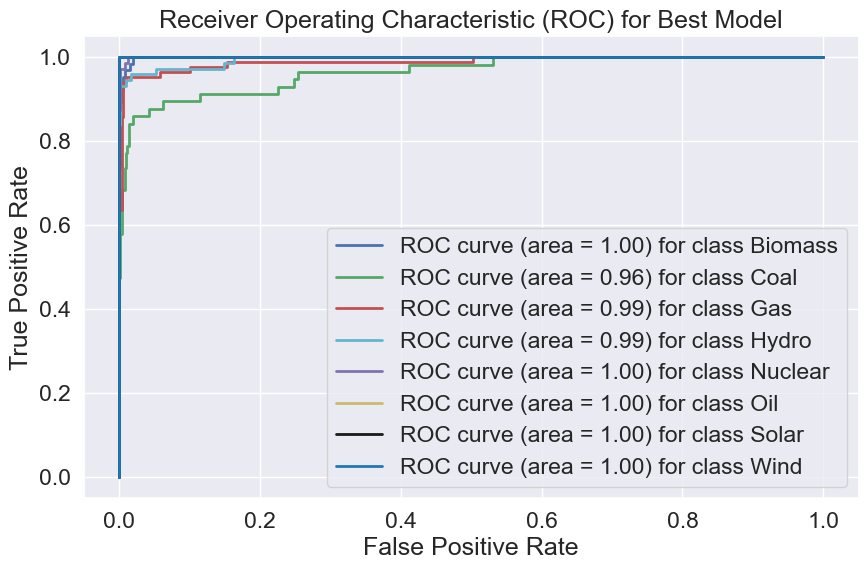

In [177]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(category_mappings['primary_fuel'])):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 6))
# one color for each category
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#1f77b4']

# Plot a roc curve for each category
for i, color in zip(range(len(category_mappings['primary_fuel'])), colors):
    class_name = category_mappings['primary_fuel'][i]
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {class_name}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Best Model')
plt.legend(loc="lower right")
plt.show()

Here we can see the area under the curve for each category we apply the best model. RandomForestClassifier in our case.

Since almost all the auc values for each class are close to 1 or are 1, which is desirable, means that the model has a high discrimination capacity.

### 4.6.3 Saving the model

In [178]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/primaryfuel_classifier_model.pkl")

['models/primaryfuel_classifier_model.pkl']

### 4.6.4  Predicting the saved model

In [179]:
# Lets load the saved model and get the predictions
model = joblib.load("models/primaryfuel_classifier_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 92.391 %


0    1    2    3    4    5    6    7    8    9    ...  542  543  \
Predicted  5.0  5.0  6.0  4.0  4.0  2.0  1.0  4.0  0.0  4.0  ...  7.0  2.0   
Original   5.0  5.0  6.0  4.0  4.0  2.0  1.0  4.0  0.0  4.0  ...  7.0  2.0   

           544  545  546  547  548  549  550  551  
Predicted  1.0  5.0  2.0  3.0  6.0  5.0  2.0  1.0  
Original   1.0  2.0  2.0  3.0  6.0  5.0  2.0  1.0  

[2 rows x 552 columns]

These are the predicted values in the fraction of the dataset we appart for testing to compare the prediction with accuracy of 92.391%.

**Final Conclusions:**

- The given dataset consists of 27 columns however, we drop some columns due to they had a lot of missing values or they do no add valuable info for our study. Therefore, we are doing EDA analysis on 13 features. We set initially the target variable as capacity_mw, that is continuous, for the regreesion prediction model and primary_fuel, that is categorical, for the classification prediction model.
- The final regression model is RandomForestRegressor with a R2 score 86.81% for predicting capacity_mw
- The final classification model is RandomForestClassifier with accuracy_score of 92.391% for predicting primary_fuel.
- Eliminating the outliers represented the elimination of 4.53% of the total records (39/861 rows). We set the threshold as 3.2 in order to conserve aproximately 3% of the data.
- In order to avoid multicollinearity issue we drop 1 columns.

_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga